# Poverty Analysis

Abstract: Looking at MN Poverty Data from the Cencus and comparing to various health and enivornmental outcomes

In [45]:
# Dependencies and Setup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, ttest_ind
import scipy.stats as stats
from requests.structures import CaseInsensitiveDict
from scipy import stats
import random
import seaborn as sns
from matplotlib.patches import Patch



# Poverty

Poverty data was pulled from the cencus API by county and year. 
See census_poverty_import.ipynb. 



In [46]:
# This csv was made in census_poverty_import.ipynb where the data was imported from the census api

load_poverty = Path("Resources/minnesota_poverty_data.csv")
poverty_df = pd.read_csv(load_poverty)
poverty_df.head(3)

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,Male Senior Poverty %,Male Senior Poverty % (White Alone),Male Senior Poverty % (Black or African American Alone),Male Senior Poverty % (American Indian and Alaska Native Alone),Male Senior Poverty % (Asian Alone),Male Senior Poverty % (Native Hawaiian and Other Pacific Islander Alone),Male Senior Poverty % (Some Other Race Alone),Male Senior Poverty % (Two or More Races),"Male Senior Poverty % (White Alone, Not Hispanic or Latino)",Male Senior Poverty % (Hispanic or Latino)
0,16129.0,2185.0,1197.0,133.0,16.0,85.0,37.0,23.0,48.0,124.0,...,1.382603,1.401960,0.000000,0.000000,0.000000,NaN,0.000000,3.125000,1.401290,0.735294
1,323359.0,20730.0,11736.0,992.0,302.0,1123.0,535.0,124.0,385.0,1314.0,...,0.360281,0.378860,0.559701,0.000000,0.063786,0.0,0.227687,0.000000,0.383482,0.178053
2,31644.0,3554.0,2010.0,251.0,69.0,109.0,50.0,21.0,75.0,312.0,...,1.131336,1.111585,6.930693,1.774273,0.000000,0.0,0.000000,0.176678,1.119657,0.000000


In [47]:
# The initial data pulled from the Cencus API has a lot of information
# Making a new dataframe with some general purpose columns

poverty_rate_df = pd.DataFrame(

    {"Year" : poverty_df['Year'],
     "County" : poverty_df['County'],
     "County Type" : poverty_df['OMB County Type'],
     "Sample Population" : poverty_df['Sample Population'],
     "Poverty Population" : poverty_df['Population Poverty'],
     "Male Poverty" : poverty_df['Male Poverty'],
     "Female Poverty" : poverty_df['Female Poverty'],
     "Poverty Rate" : poverty_df['Poverty %'],
     "Male Poverty Rate" : poverty_df['Male Poverty %'],
     "Female Poverty Rate" : poverty_df['Female Poverty %'],
     "Child Poverty Rate" : poverty_df['Child Poverty %'],
     "Senior Poverty Rate" : poverty_df['Senior Poverty %'],
     "Poverty Rate (White Alone)" : poverty_df['Poverty % (White Alone)'],
     "Poverty Rate (Black or African American Alone)" : poverty_df['Poverty % (Black or African American Alone)'],
     "Poverty Rate (American Indian and Alaska Native Alone)" : poverty_df['Poverty % (American Indian and Alaska Native Alone)'],
     "Poverty Rate (Asian Alone)" : poverty_df['Poverty % (Asian Alone)'],
     "Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)" : poverty_df['Poverty % (Native Hawaiian and Other Pacific Islander Alone)'],
     "Poverty Rate (Some Other Race Alone)" : poverty_df['Poverty % (Some Other Race Alone)'],
     "Poverty Rate (Two or More Races)" : poverty_df['Poverty % (Two or More Races)'],
     "Poverty Rate (White Alone, Not Hispanic or Latino)" : poverty_df['Poverty % (White Alone, Not Hispanic or Latino)'],
     "Poverty Rate (Hispanic or Latino)" : poverty_df['Poverty % (Hispanic or Latino)']
    }
)

# Original data had created percentage rates but didn't round them. 
poverty_rate_df = poverty_rate_df.round(2)
poverty_rate_df.head()

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Senior Poverty Rate,Poverty Rate (White Alone),Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino)
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,3.52,12.22,14.29,45.60,16.07,NaN,79.69,33.04,12.22,44.12
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,1.03,5.28,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,2.77,9.04,34.65,33.07,17.46,0.0,27.40,22.97,8.90,33.03
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,2.12,11.89,25.84,50.21,15.30,0.0,17.92,31.26,11.75,28.80
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,1.47,10.48,42.88,42.64,9.02,NaN,14.81,50.08,9.95,45.33


In [48]:
# Data cleaning for blank rates
poverty_rate_df['Poverty Population'] = poverty_rate_df['Poverty Population'].fillna(0)
poverty_rate_df['Male Poverty'] = poverty_rate_df['Male Poverty'].fillna(0)
poverty_rate_df['Female Poverty'] = poverty_rate_df['Female Poverty'].fillna(0)
poverty_rate_df['Sample Population'] = poverty_rate_df['Sample Population'].fillna(0)
poverty_rate_df['Poverty Rate'] = poverty_rate_df['Poverty Rate'].fillna(0)
poverty_rate_df['Poverty Rate (White Alone)'] = poverty_rate_df['Poverty Rate (White Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (Black or African American Alone)'] = poverty_rate_df['Poverty Rate (Black or African American Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (American Indian and Alaska Native Alone)'] = poverty_rate_df['Poverty Rate (American Indian and Alaska Native Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (Asian Alone)'] = poverty_rate_df['Poverty Rate (Asian Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)'] = poverty_rate_df['Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (Some Other Race Alone)'] = poverty_rate_df['Poverty Rate (Some Other Race Alone)'].fillna(0)
poverty_rate_df['Poverty Rate (Two or More Races)'] = poverty_rate_df['Poverty Rate (Two or More Races)'].fillna(0)
poverty_rate_df['Poverty Rate (White Alone, Not Hispanic or Latino)'] = poverty_rate_df['Poverty Rate (White Alone, Not Hispanic or Latino)'].fillna(0)
poverty_rate_df['Poverty Rate (Hispanic or Latino)'] = poverty_rate_df['Poverty Rate (Hispanic or Latino)'].fillna(0)
poverty_rate_df.head(5)

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Senior Poverty Rate,Poverty Rate (White Alone),Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino)
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,3.52,12.22,14.29,45.60,16.07,0.0,79.69,33.04,12.22,44.12
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,1.03,5.28,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,2.77,9.04,34.65,33.07,17.46,0.0,27.40,22.97,8.90,33.03
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,2.12,11.89,25.84,50.21,15.30,0.0,17.92,31.26,11.75,28.80
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,1.47,10.48,42.88,42.64,9.02,0.0,14.81,50.08,9.95,45.33


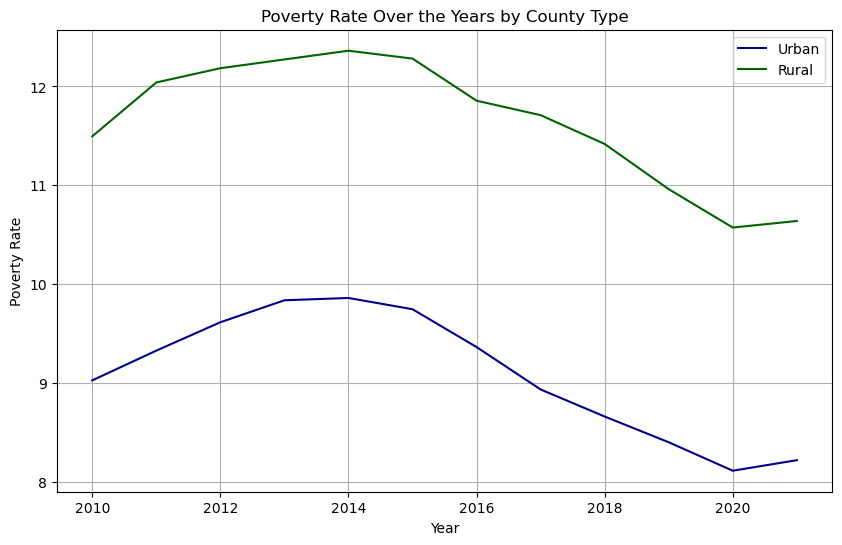

In [49]:
# Graph differences between urban and rural counties 
county_type_df = poverty_rate_df.groupby(["Year", "County Type"])['Poverty Rate'].mean().reset_index()

urban_data = county_type_df[county_type_df["County Type"] == "Urban"]
rural_data = county_type_df[county_type_df["County Type"] == "Rural"]

plt.figure(figsize=(10, 6)) 
plt.plot(urban_data["Year"], urban_data["Poverty Rate"], label="Urban", color='darkblue')
plt.plot(rural_data["Year"], rural_data["Poverty Rate"], label="Rural", color='darkgreen')
plt.xlabel("Year")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Over the Years by County Type")
plt.legend()
plt.grid(True)
plt.savefig("Charts/Poverty/000_poverty_counties_over_time.png")
plt.show()


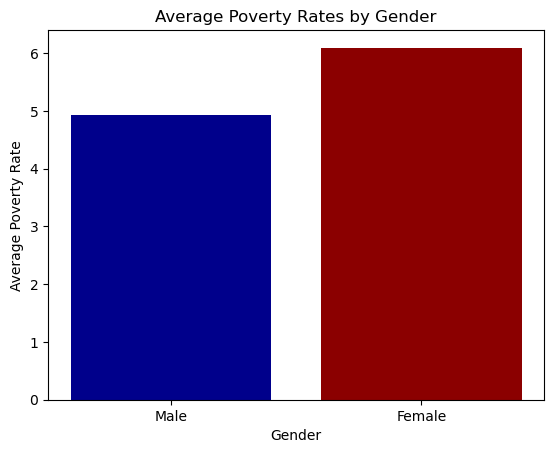

In [50]:
# Graph poverty by gender
male_avg = poverty_rate_df['Male Poverty Rate'].mean()
female_avg = poverty_rate_df['Female Poverty Rate'].mean()

plt.bar(['Male', 'Female'], [male_avg, female_avg], color=['darkblue', 'darkred'])

plt.xlabel('Gender')
plt.ylabel('Average Poverty Rate')
plt.title('Average Poverty Rates by Gender')
plt.savefig("Charts/Poverty/001_gender_bars.png",dpi=300, bbox_inches = "tight")
plt.show()

<Figure size 800x600 with 0 Axes>

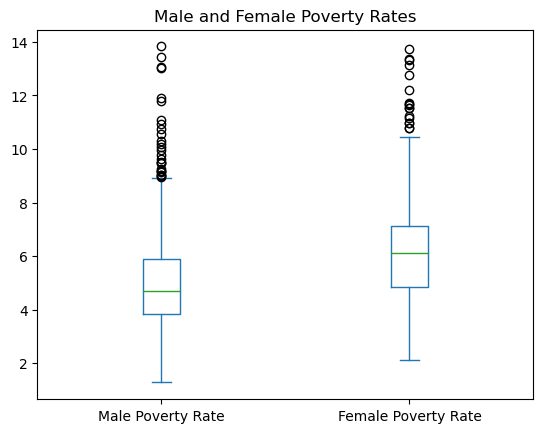

In [51]:
#Used Code from https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
#https://www.geeksforgeeks.org/how-to-create-boxplot-from-pandas-dataframe/#


plt.figure(figsize=(8, 6))

poverty_rate_df[['Male Poverty Rate', 'Female Poverty Rate']].plot(kind='box', vert=True, title='Male and Female Poverty Rates')
plt.savefig("Charts/Poverty/003_gender_box.png",dpi=300, bbox_inches = "tight")
plt.show()


<Figure size 800x600 with 0 Axes>

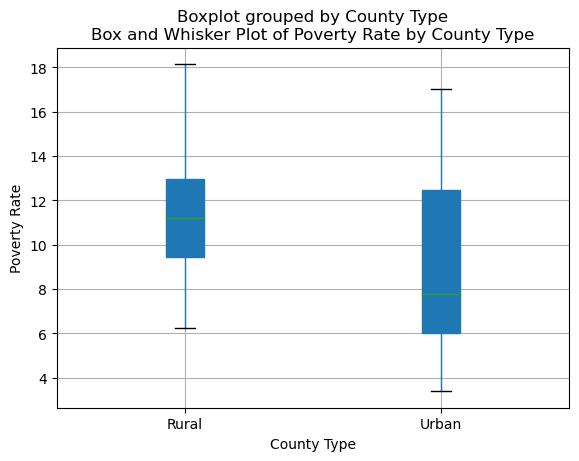

In [52]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# https://www.w3resource.com/pandas/dataframe/dataframe-boxplot.php

poverty_rate_df['Poverty Rate'] = pd.to_numeric(poverty_rate_df['Poverty Rate'], errors='coerce')

# Create a box and whisker plot
plt.figure(figsize=(8, 6))
poverty_rate_df.boxplot(column='Poverty Rate', by='County Type', showfliers=False, patch_artist=True)
plt.title('Box and Whisker Plot of Poverty Rate by County Type')
plt.ylabel('Poverty Rate')
plt.xlabel('County Type')
plt.savefig("Charts/Poverty/009_boxplot_poverty_rate.png", dpi=300, bbox_inches="tight")
plt.show()


In [53]:
poverty_rate_df.columns

Index(['Year', 'County', 'County Type', 'Sample Population',
       'Poverty Population', 'Male Poverty', 'Female Poverty', 'Poverty Rate',
       'Male Poverty Rate', 'Female Poverty Rate', 'Child Poverty Rate',
       'Senior Poverty Rate', 'Poverty Rate (White Alone)',
       'Poverty Rate (Black or African American Alone)',
       'Poverty Rate (American Indian and Alaska Native Alone)',
       'Poverty Rate (Asian Alone)',
       'Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)',
       'Poverty Rate (Some Other Race Alone)',
       'Poverty Rate (Two or More Races)',
       'Poverty Rate (White Alone, Not Hispanic or Latino)',
       'Poverty Rate (Hispanic or Latino)'],
      dtype='object')

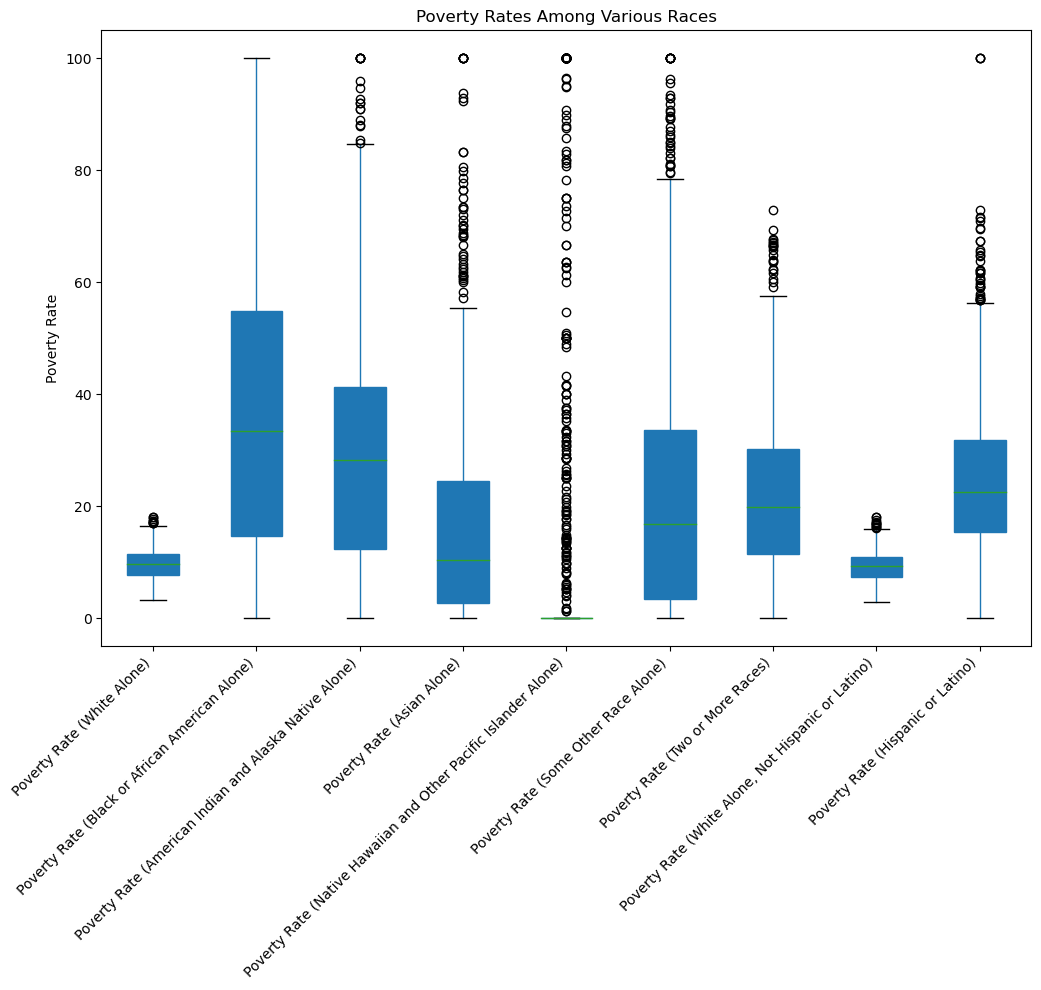

In [54]:
# Assuming 'Poverty Rate' columns for different races
race_columns = ['Poverty Rate (White Alone)', 'Poverty Rate (Black or African American Alone)',
                'Poverty Rate (American Indian and Alaska Native Alone)', 'Poverty Rate (Asian Alone)',
                'Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)',
                'Poverty Rate (Some Other Race Alone)', 'Poverty Rate (Two or More Races)',
                'Poverty Rate (White Alone, Not Hispanic or Latino)', 'Poverty Rate (Hispanic or Latino)']

# Convert the specified columns to numeric
poverty_rate_df[race_columns] = poverty_rate_df[race_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 8))
poverty_rate_df[race_columns].boxplot(grid=False, vert=True, patch_artist=True)
plt.title('Poverty Rates Among Various Races')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45, ha='right')  
plt.savefig("Charts/Poverty/010_boxplot_poverty_rates_by_race.png", dpi=300, bbox_inches="tight")
plt.show()


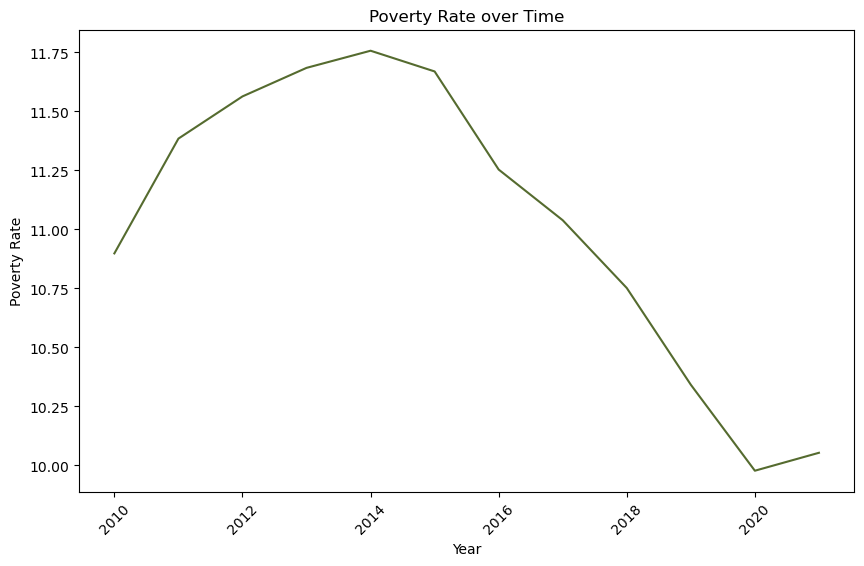

In [55]:
# Poverty Over time
poverty_time = poverty_rate_df.groupby('Year')['Poverty Rate'].mean()

# Chart Poverty Over Time
plt.figure(figsize=(10, 6))
poverty_time.plot(kind='line', color='darkolivegreen')
plt.title('Poverty Rate over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45)
plt.savefig("Charts/Poverty/004_poverty_time.png",dpi=300, bbox_inches = "tight")
plt.show()

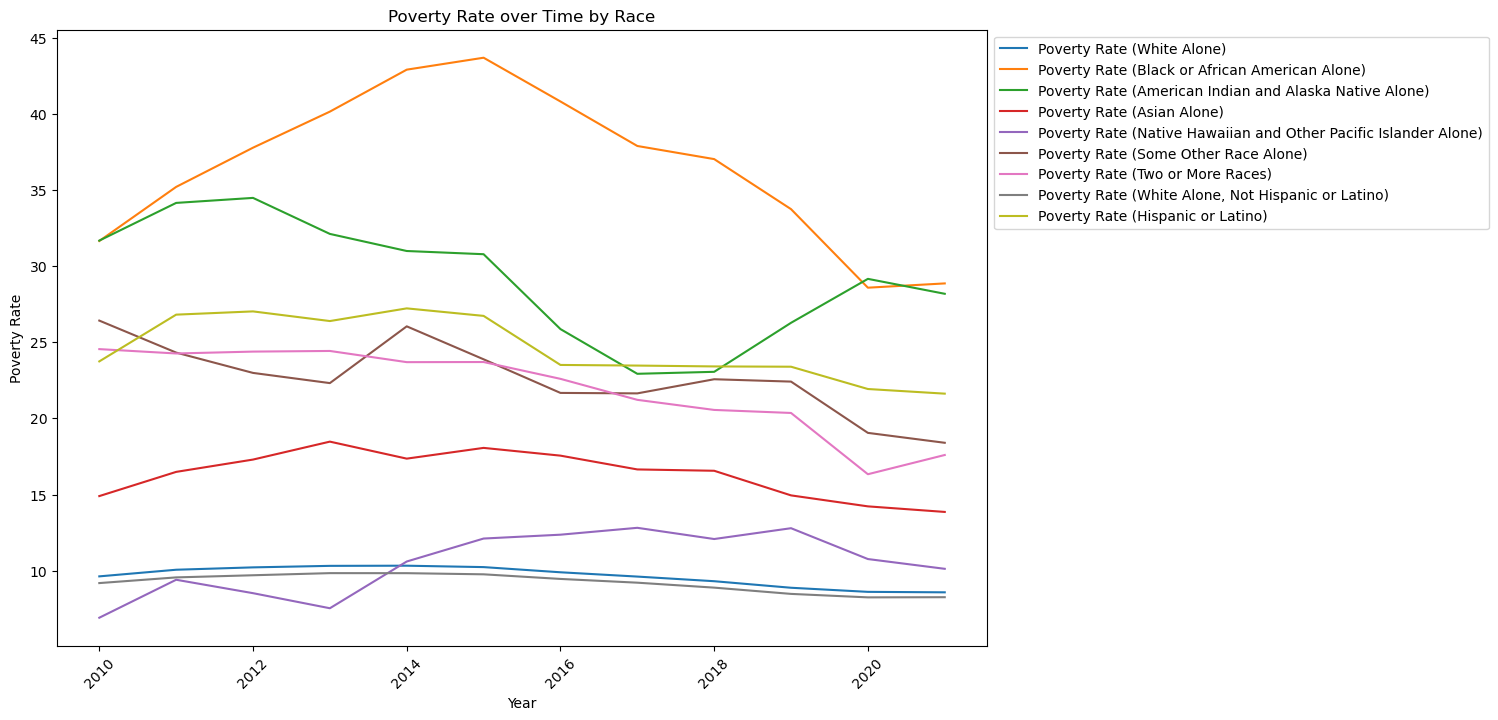

In [56]:
race_columns = ['Poverty Rate (White Alone)', 'Poverty Rate (Black or African American Alone)',
                'Poverty Rate (American Indian and Alaska Native Alone)', 'Poverty Rate (Asian Alone)',
                'Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)',
                'Poverty Rate (Some Other Race Alone)', 'Poverty Rate (Two or More Races)',
                'Poverty Rate (White Alone, Not Hispanic or Latino)', 'Poverty Rate (Hispanic or Latino)']

poverty_rate_df[race_columns] = poverty_rate_df[race_columns].apply(pd.to_numeric, errors='coerce')

poverty_time_race = poverty_rate_df.groupby('Year')[race_columns].mean()

plt.figure(figsize=(12, 8))
for column in race_columns:
    plt.plot(poverty_time_race.index, poverty_time_race[column], label=column)

plt.title('Poverty Rate over Time by Race')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.savefig("Charts/Poverty/011_poverty_time_by_race.png", dpi=300, bbox_inches="tight")
plt.show()

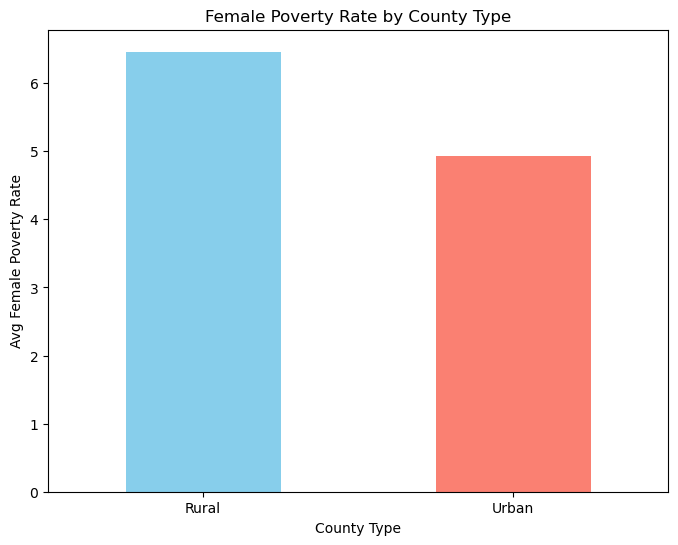

In [57]:
poverty_rate_df['Female Poverty Rate'] = pd.to_numeric(poverty_rate_df['Female Poverty Rate'], errors='coerce')

female_poverty_by_county_type = poverty_rate_df.groupby('County Type')['Female Poverty Rate'].mean()

plt.figure(figsize=(8, 6))
female_poverty_by_county_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Female Poverty Rate by County Type')
plt.xlabel('County Type')
plt.ylabel('Avg Female Poverty Rate')
plt.xticks(rotation=0)  
plt.savefig("Charts/Poverty/012_female_poverty_by_county_type.png", dpi=300, bbox_inches="tight")
plt.show()

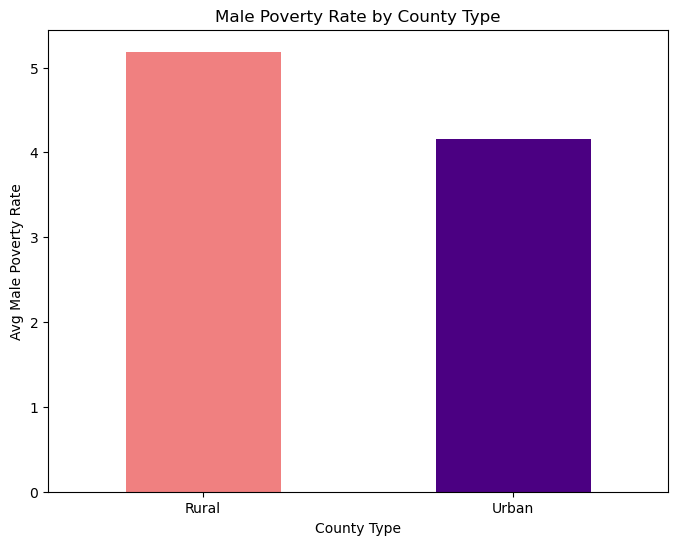

In [58]:
poverty_rate_df['Male Poverty Rate'] = pd.to_numeric(poverty_rate_df['Male Poverty Rate'], errors='coerce')

male_poverty_by_county_type = poverty_rate_df.groupby('County Type')['Male Poverty Rate'].mean()

plt.figure(figsize=(8, 6))
male_poverty_by_county_type.plot(kind='bar', color=['lightcoral', 'indigo'])
plt.title('Male Poverty Rate by County Type')
plt.xlabel('County Type')
plt.ylabel('Avg Male Poverty Rate')
plt.xticks(rotation=0)  
plt.savefig("Charts/Poverty/013_male_poverty_by_county_type.png", dpi=300, bbox_inches="tight")
plt.show()

In [59]:
poverty_rate_df.columns

Index(['Year', 'County', 'County Type', 'Sample Population',
       'Poverty Population', 'Male Poverty', 'Female Poverty', 'Poverty Rate',
       'Male Poverty Rate', 'Female Poverty Rate', 'Child Poverty Rate',
       'Senior Poverty Rate', 'Poverty Rate (White Alone)',
       'Poverty Rate (Black or African American Alone)',
       'Poverty Rate (American Indian and Alaska Native Alone)',
       'Poverty Rate (Asian Alone)',
       'Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)',
       'Poverty Rate (Some Other Race Alone)',
       'Poverty Rate (Two or More Races)',
       'Poverty Rate (White Alone, Not Hispanic or Latino)',
       'Poverty Rate (Hispanic or Latino)'],
      dtype='object')

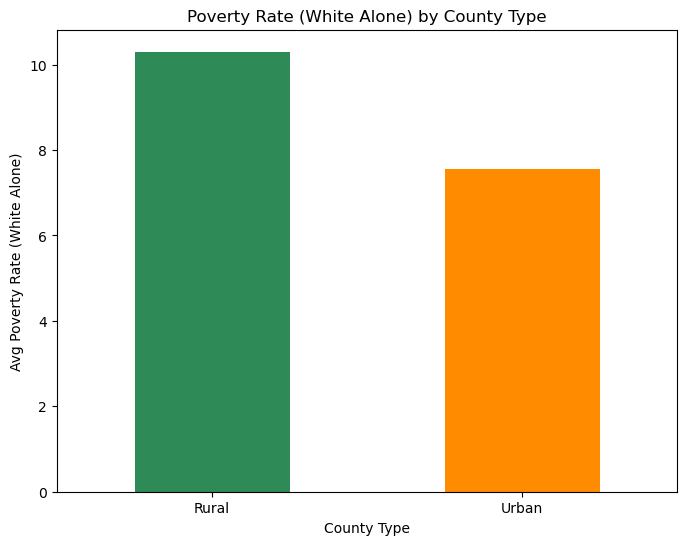

In [60]:
poverty_rate_df['Poverty Rate (White Alone)'] = pd.to_numeric(poverty_rate_df['Poverty Rate (White Alone)'], errors='coerce')

white_poverty_by_county_type = poverty_rate_df.groupby('County Type')['Poverty Rate (White Alone)'].mean()

plt.figure(figsize=(8, 6))
white_poverty_by_county_type.plot(kind='bar', color=['seagreen', 'darkorange'])
plt.title('Poverty Rate (White Alone) by County Type')
plt.xlabel('County Type')
plt.ylabel('Avg Poverty Rate (White Alone)')
plt.xticks(rotation=0)  
plt.savefig("Charts/Poverty/014_white_poverty_by_county_type.png", dpi=300, bbox_inches="tight")
plt.show()

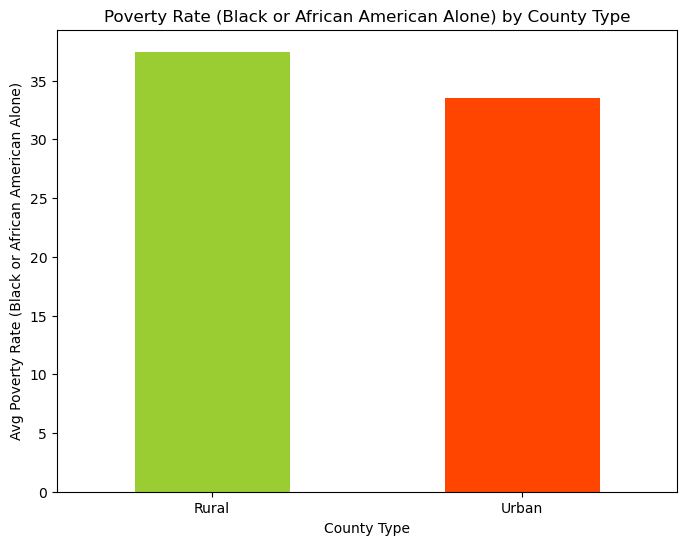

In [61]:
poverty_rate_df['Poverty Rate (Black or African American Alone)'] = pd.to_numeric(poverty_rate_df['Poverty Rate (Black or African American Alone)'], errors='coerce')

black_poverty_by_county_type = poverty_rate_df.groupby('County Type')['Poverty Rate (Black or African American Alone)'].mean()

plt.figure(figsize=(8, 6))
black_poverty_by_county_type.plot(kind='bar', color=['yellowgreen', 'orangered'])
plt.title('Poverty Rate (Black or African American Alone) by County Type')
plt.xlabel('County Type')
plt.ylabel('Avg Poverty Rate (Black or African American Alone)')
plt.xticks(rotation=0)  
plt.savefig("Charts/Poverty/015_black_poverty_by_county_type.png", dpi=300, bbox_inches="tight")
plt.show()

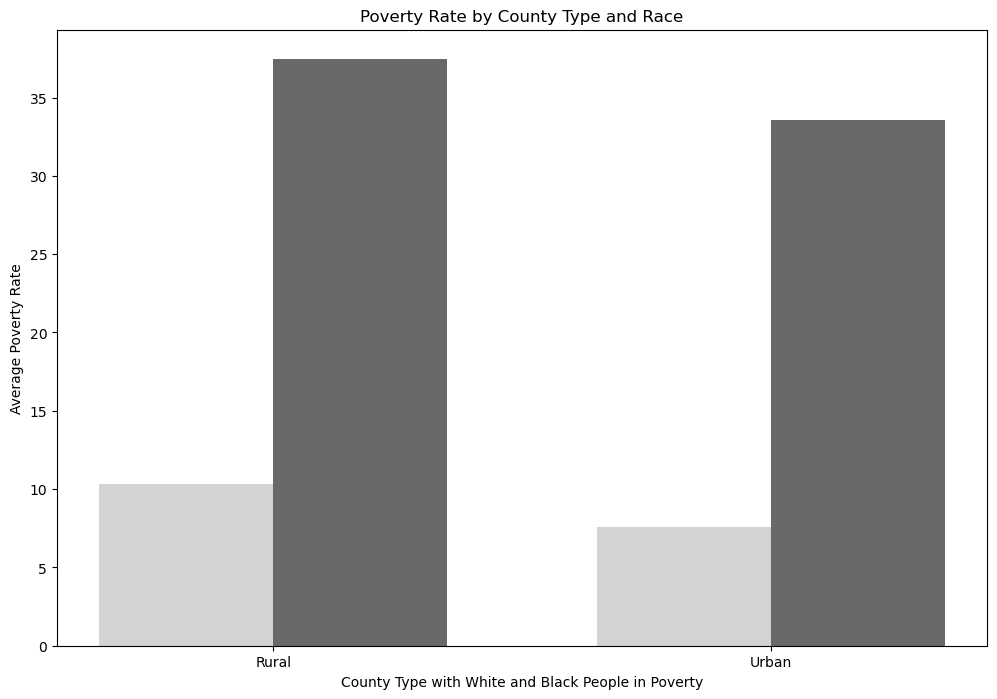

In [62]:
# Assuming columns for White and Black Alone Poverty Rates
white_column = 'Poverty Rate (White Alone)'
black_column = 'Poverty Rate (Black or African American Alone)'

# Convert the specified columns to numeric
poverty_rate_df[[white_column, black_column]] = poverty_rate_df[[white_column, black_column]].apply(pd.to_numeric, errors='coerce')

# Group by 'County Type' and calculate the mean for each racial category
white_poverty_by_county_type = poverty_rate_df.groupby('County Type')[white_column].mean()
black_poverty_by_county_type = poverty_rate_df.groupby('County Type')[black_column].mean()

# Create a bar chart with grouped bars for each racial category
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(white_poverty_by_county_type))
white_bars = plt.bar(index, white_poverty_by_county_type, width=bar_width, label='White Alone (Urban)', color=['lightgray', 'lightgray'])
black_bars = plt.bar([i + bar_width for i in index], black_poverty_by_county_type, width=bar_width, label='Black or African American Alone (Urban)', color=['dimgray', 'dimgray'])

plt.title('Poverty Rate by County Type and Race')
plt.xlabel('County Type with White and Black People in Poverty')
plt.ylabel('Average Poverty Rate')
plt.xticks([i + bar_width / 2 for i in index], white_poverty_by_county_type.index)

# Create a custom legend using the Patch class


plt.savefig("Charts/Poverty/016_combined_poverty_by_county_type_and_race.png", dpi=300, bbox_inches="tight")
plt.show()

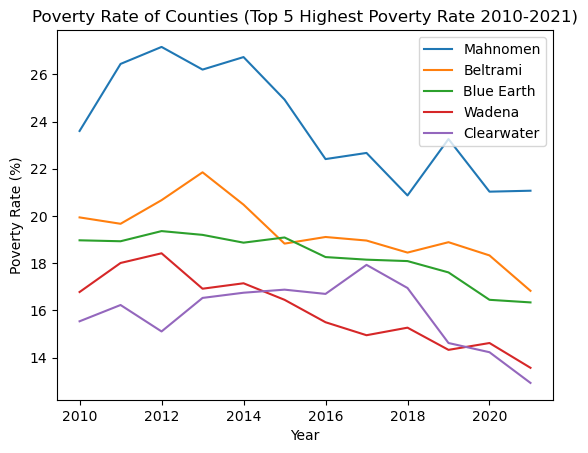

County
Mahnomen      23.864167
Beltrami      19.334167
Blue Earth    18.276667
Wadena        15.997500
Clearwater    15.866667
                ...    
Dodge          6.105000
Wright         5.480000
Scott          5.366667
Washington     5.071667
Carver         4.337500
Name: Poverty Rate, Length: 87, dtype: float64


In [63]:
# Top 5 Highest Poverty Rate (ALL ARE RURAL COUNTIES)
year = poverty_rate_df['Year'].unique()
benton = poverty_rate_df[poverty_rate_df['County']=='Mahnomen']['Poverty Rate']
cass = poverty_rate_df[poverty_rate_df['County']=='Beltrami']['Poverty Rate']
cook = poverty_rate_df[poverty_rate_df['County']=='Blue Earth']['Poverty Rate']
cottonwood = poverty_rate_df[poverty_rate_df['County']=='Wadena']['Poverty Rate']
hubbard = poverty_rate_df[poverty_rate_df['County']=='Clearwater']['Poverty Rate']
# Line Graph
plt.plot(year, benton, label = 'Mahnomen')
plt.plot(year, cass, label = 'Beltrami')
plt.plot(year, cook, label = 'Blue Earth')
plt.plot(year, cottonwood, label = 'Wadena')
plt.plot(year, hubbard, label = 'Clearwater')

plt.title('Poverty Rate of Counties (Top 5 Highest Poverty Rate 2010-2021)')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.savefig("Charts/Poverty/005_highest_poverty_rate.png", dpi=300, bbox_inches = "tight")
plt.show()

print(poverty_rate_df[['County','Poverty Rate']].groupby('County').mean()['Poverty Rate'].sort_values(ascending = False))


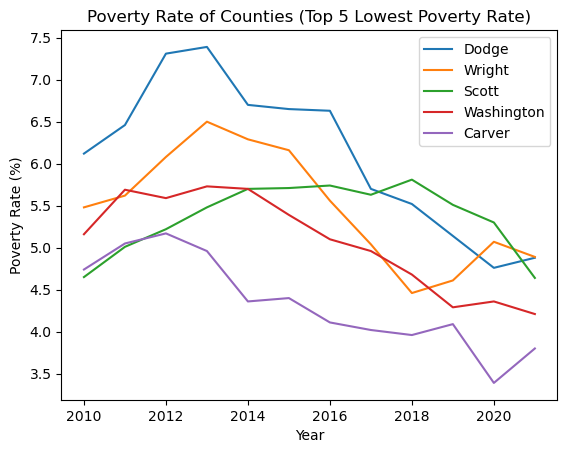

In [64]:
# Top 5 Lowest Poverty Rates (ALL ARE URBAN COUNTIES)

dodge = poverty_rate_df[poverty_rate_df['County']=='Dodge']['Poverty Rate']
wright = poverty_rate_df[poverty_rate_df['County']=='Wright']['Poverty Rate']
scott = poverty_rate_df[poverty_rate_df['County']=='Scott']['Poverty Rate']
washington = poverty_rate_df[poverty_rate_df['County']=='Washington']['Poverty Rate']
carver = poverty_rate_df[poverty_rate_df['County']=='Carver']['Poverty Rate']

# Line Graph
plt.plot(year, dodge, label = 'Dodge')
plt.plot(year, wright, label = 'Wright')
plt.plot(year, scott, label = 'Scott')
plt.plot(year, washington, label = 'Washington')
plt.plot(year, carver, label = 'Carver')

plt.title('Poverty Rate of Counties (Top 5 Lowest Poverty Rate)')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.savefig("Charts/Poverty/006_lowest_poverty_rate.png", dpi=300, bbox_inches = "tight")
plt.show()


In [65]:
poverty_rate_df[(poverty_rate_df['County']=='Meeker')|
                  (poverty_rate_df['County']=='Ramsey')
                  ]

# Poverty Rates Above 15%
poverty_rate_df[(poverty_rate_df['Poverty Rate'] < 11)]


,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Senior Poverty Rate,Poverty Rate (White Alone),Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino)
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,1.03,5.28,22.62,15.98,6.71,0.00,23.09,11.45,5.13,16.39
5,2010,Big Stone,Rural,5320.0,500.0,211.0,289.0,9.40,3.97,5.43,...,3.36,9.00,100.00,0.00,0.00,0.00,14.29,26.32,9.05,8.20
7,2010,Brown,Rural,24833.0,2434.0,1078.0,1356.0,9.80,4.34,5.46,...,2.84,9.97,63.64,0.00,3.42,0.00,0.80,1.36,9.69,15.40
8,2010,Carlton,Urban,33658.0,3520.0,1653.0,1867.0,10.46,4.91,5.55,...,2.06,8.95,25.17,32.59,6.49,0.00,0.74,19.97,8.90,9.74
9,2010,Carver,Urban,88071.0,4172.0,1668.0,2504.0,4.74,1.89,2.84,...,0.77,3.69,17.09,19.81,3.57,0.00,46.12,15.20,3.61,25.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2021,Wabasha,Urban,21212.0,1503.0,742.0,761.0,7.09,3.50,3.59,...,1.90,6.48,2.06,18.33,25.78,0.00,51.15,7.55,5.96,37.73
1037,2021,Waseca,Rural,18037.0,1456.0,572.0,884.0,8.07,3.17,4.90,...,1.99,6.48,76.24,6.20,5.11,0.00,50.47,22.79,5.98,31.59
1038,2021,Washington,Urban,261262.0,11010.0,5103.0,5907.0,4.21,1.95,2.26,...,1.23,3.64,10.21,26.10,4.06,8.21,8.90,7.01,3.52,8.53
1042,2021,Wright,Urban,138525.0,6767.0,2902.0,3865.0,4.89,2.09,2.79,...,1.35,4.52,2.18,12.61,5.01,0.00,10.44,14.05,4.53,12.81


In [66]:
# Copied dataframe as we were working with different df names combining final code
poverty_filter_df = poverty_rate_df.copy()
poverty_filter_df.head()

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Senior Poverty Rate,Poverty Rate (White Alone),Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino)
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,3.52,12.22,14.29,45.60,16.07,0.0,79.69,33.04,12.22,44.12
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,1.03,5.28,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,2.77,9.04,34.65,33.07,17.46,0.0,27.40,22.97,8.90,33.03
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,2.12,11.89,25.84,50.21,15.30,0.0,17.92,31.26,11.75,28.80
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,1.47,10.48,42.88,42.64,9.02,0.0,14.81,50.08,9.95,45.33


In [67]:
# Urban Vs Rural

# Sorted by County to make seeing county values per year easier
poverty_filter_df.sort_values(by='County')

# # Total Average Poverty Rate of Rural and Urban Counties between 2010 and 2021
# print(f'Mean Poverty Rate of Rural and Urban Counties between 2010 and 2021')
# print('-----------------------------------------------')
# print(poverty_filter_df[['OMB County Type','Poverty %']].groupby('OMB County Type').mean()['Poverty %'])

# Total Average Poverty Rate of MN
print(f'Mean Poverty Rate of Minnesota between 2010 and 2021')
print('-----------------------------------------------')
print(poverty_filter_df[['Year','Poverty Rate']].groupby('Year').mean()['Poverty Rate'])

# Mean Poverty Rate per County (2010-2021) along with OMB County Type
result = poverty_filter_df[['County', 'Poverty Rate', 'County Type']].groupby('County').agg({'Poverty Rate': 'mean', 'County Type': 'first'}).reset_index()

result

# Mean Poverty Rate of MN (2010-2021)
mean_mn = (poverty_filter_df[['Year','Poverty Rate']].groupby('Year').mean()['Poverty Rate']).mean()
mean_mn

Mean Poverty Rate of Minnesota between 2010 and 2021
-----------------------------------------------
Year
2010    10.898506
2011    11.384828
2012    11.563563
2013    11.684483
2014    11.757126
2015    11.669310
2016    11.253678
2017    11.038966
2018    10.751839
2019    10.342069
2020     9.977816
2021    10.053793
Name: Poverty Rate, dtype: float64


11.031331417624521

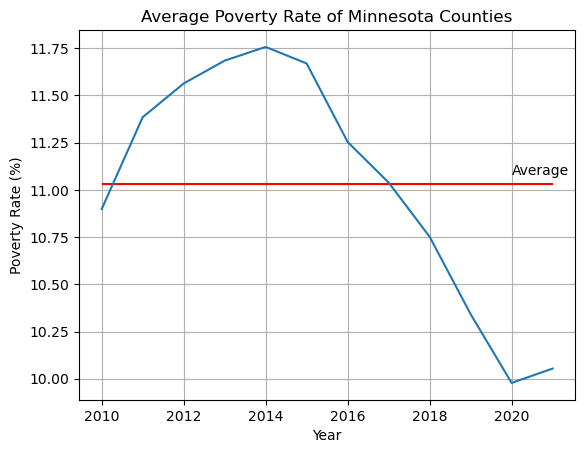

In [68]:
# Line Chart of Rural vs Urban Poverty Rate overtime
rural_urban_df = poverty_filter_df[['Year','County Type','Poverty Rate']].groupby(['Year','County Type']).mean().reset_index(drop=False)
rural_urban_df

Years = poverty_filter_df['Year'].unique()
rural = rural_urban_df[rural_urban_df['County Type']=='Rural']['Poverty Rate']
urban = rural_urban_df[rural_urban_df['County Type']=='Urban']['Poverty Rate']
total_pov = poverty_filter_df[['Year','Poverty Rate']].groupby('Year').mean()['Poverty Rate']

plt.hlines(y=11.031276355536079, xmin=2010, xmax=2021, color='red')
plt.text(2020, 11.10, 'Average', ha='left', va='center')

plt.plot(Years, total_pov)
plt.grid()
plt.title('Average Poverty Rate of Minnesota Counties')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('Year')
plt.savefig('Charts/Poverty/007_avg_pov_rate.png', dpi=300, bbox_inches = "tight")
plt.show()

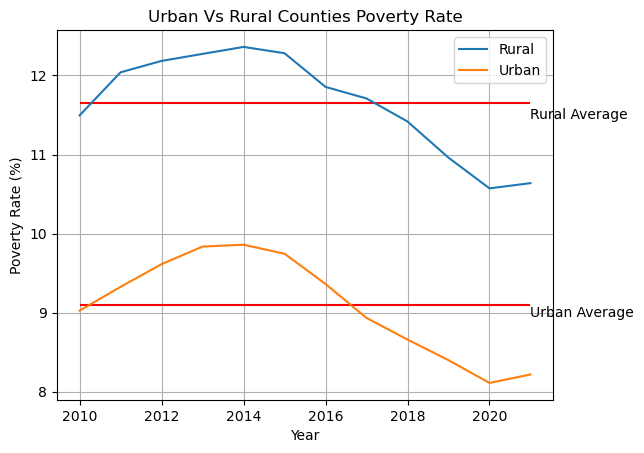

In [69]:
# Urban Vs Rural Poverty Rate line chart

plt.hlines(y=9.090625, xmin=2010, xmax=2021, color='red')
plt.text(2021, 9, 'Urban Average', ha='left', va='center')

plt.hlines(y=11.648756, xmin=2010, xmax=2021, color='red')
plt.text(2021, 11.5, 'Rural Average', ha='left', va='center')

plt.plot(Years, rural, label = 'Rural')
plt.plot(Years, urban, label = 'Urban')
plt.grid()
plt.legend()
plt.title('Urban Vs Rural Counties Poverty Rate')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('Year')
plt.savefig('Charts/Poverty/008_avg_pov_rate.png', dpi=300, bbox_inches = "tight")
plt.show()

Compare poverty to enviornmental and health conditions

# Arsenic and Lead

## Hypothesis: As poverty levels rise, so will arsenic levels

In [70]:
# Load Arsenic data from CSV obtained from MN Health

arsenic = Path('Resources/arsenic_county_year.csv')
arsenic_df = pd.read_csv(arsenic)

lead_path = Path("Resources/lead_by_blood_levels.csv")
water_arsenic = Path("Resources/water_arsenic.csv")

lead_df = pd.read_csv(lead_path)
water_arsenic_df = pd.read_csv(water_arsenic)

small_arsenic_df = arsenic_df[(arsenic_df['year']>2009) & (arsenic_df['year']<2022)]
arsenic_poverty = pd.merge(poverty_rate_df, small_arsenic_df, how = 'left', left_on = ['Year', 'County'], right_on = ['year', 'countyServed'])
arsenic_poverty.head()

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Unnamed: 0,year,countyServed,max arsenic (ug/L)
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,16.07,0.0,79.69,33.04,12.22,44.12,861.0,2010.0,Aitkin,5.82
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,6.71,0.0,23.09,11.45,5.13,16.39,862.0,2010.0,Anoka,12.60
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,17.46,0.0,27.40,22.97,8.90,33.03,863.0,2010.0,Becker,15.70
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,15.30,0.0,17.92,31.26,11.75,28.80,864.0,2010.0,Beltrami,5.56
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,9.02,0.0,14.81,50.08,9.95,45.33,865.0,2010.0,Benton,2.61


In [79]:
# drop NA values to enable regression
arsenic_clean = arsenic_poverty.dropna()

# Linear regression on Arsenic and Poverty
x_values = arsenic_clean['Poverty Rate']
y_values = arsenic_clean['max arsenic (ug/L)']

# Function For Regression Analysis
def lrp_function(x_values, y_values, x_label="", y_label="", ann_pos=(0,0), output_file="Charts/output.png", title=""):
    data = pd.DataFrame({'x': x_values, 'y': y_values})

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors = 'black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,ann_pos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(output_file, dpi=300, bbox_inches = "tight")
    plt.title(title)
    plt.show()

The r-squared is: 1.0264094323745651e-05


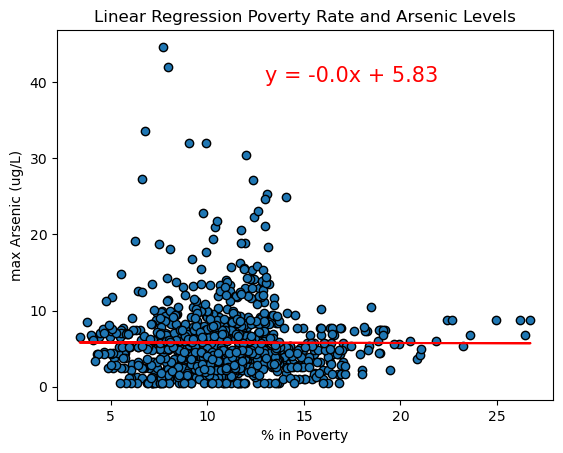

In [80]:
x_label = '% in Poverty'
y_label = 'max Arsenic (ug/L)'
x_range = (0, 30)
y_range = (0, 50)
ann_pos = (13, 40)
title = "Linear Regression Poverty Rate and Arsenic Levels"
output_file = 'Charts/Arsenic/000_arsenic_linear_regression.png'

lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file, title)


In [81]:
# Find counties with high levels of Arsenic

arsenic_highest = arsenic_poverty[arsenic_poverty['max arsenic (ug/L)']>10]
arsenic_counts = arsenic_highest.groupby('County').value_counts().reset_index()
county_totals = arsenic_highest.groupby('County').size()
high_arsenic_counties = county_totals>7
high_arsenic_counties = high_arsenic_counties[high_arsenic_counties == True]
#Becker, Grant, Otter Tail, Polk, Roseau
arsenic_counts

,County,Year,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Unnamed: 0,year,countyServed,max arsenic (ug/L),count
0,Anoka,2010,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,0.0,23.09,11.45,5.13,16.39,862.0,2010.0,Anoka,12.6,1
1,Anoka,2011,Urban,325869.0,21514.0,9744.0,11770.0,6.60,2.99,3.61,...,0.0,22.45,15.33,5.39,16.41,949.0,2011.0,Anoka,12.4,1
2,Becker,2021,Rural,34342.0,3752.0,1662.0,2090.0,10.93,4.84,6.09,...,0.0,4.41,18.59,8.41,23.14,1731.0,2021.0,Becker,13.1,1
3,Becker,2020,Rural,33659.0,3588.0,1561.0,2027.0,10.66,4.64,6.02,...,0.0,0.33,21.60,8.14,19.61,1644.0,2020.0,Becker,12.5,1
4,Becker,2018,Rural,33208.0,4090.0,1732.0,2358.0,12.32,5.22,7.10,...,0.0,6.45,26.80,9.62,31.93,1470.0,2018.0,Becker,12.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Stearns,2015,Urban,145280.0,19570.0,9275.0,10295.0,13.47,6.38,7.09,...,0.0,29.06,20.84,10.97,33.18,1281.0,2015.0,Stearns,10.7,1
95,Yellow Medicine,2015,Rural,9861.0,1175.0,588.0,587.0,11.92,5.96,5.95,...,0.0,16.31,21.59,9.84,33.00,1295.0,2015.0,Yellow Medicine,15.6,1
96,Yellow Medicine,2014,Rural,10006.0,1318.0,574.0,744.0,13.17,5.74,7.44,...,0.0,46.15,28.33,10.41,57.91,1208.0,2014.0,Yellow Medicine,13.5,1
97,Yellow Medicine,2010,Rural,10381.0,1317.0,540.0,777.0,12.69,5.20,7.48,...,100.0,62.40,63.51,9.37,70.95,947.0,2010.0,Yellow Medicine,12.9,1


2012 data is missing:


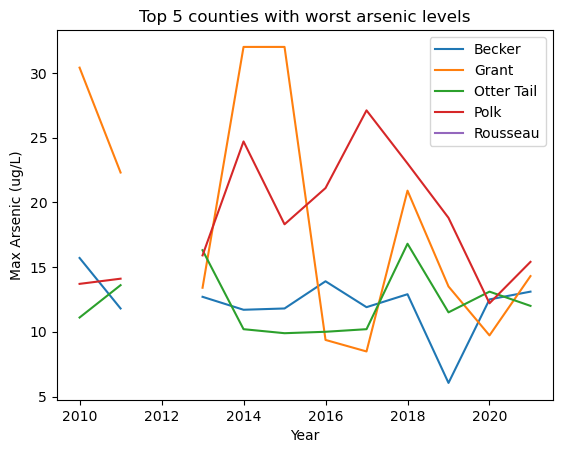

In [82]:

counties = ['Becker', 'Grant', 'Otter Tail', 'Polk', 'Rousseau']
# years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

filtered_df = arsenic_poverty[arsenic_poverty['County'].isin(counties)]
for county in counties:
    county_data = filtered_df[filtered_df['County'] == county]
    x_values = county_data['Year']
    y_values = county_data['max arsenic (ug/L)']
    plt.plot(x_values, y_values, label=county)

plt.xlabel('Year')
plt.ylabel('Max Arsenic (ug/L)')
plt.title('Top 5 counties with worst arsenic levels')
plt.legend()
plt.savefig('Charts/Arsenic/001_arsenic_worst_counties_line.png', dpi=300, bbox_inches = "tight")
print('2012 data is missing:')
plt.show()

In [83]:
arsenic_load = Path("Resources/water_arsenic.csv")
arsenic_data = pd.read_csv(arsenic_load)
arsenic_data = arsenic_data.dropna()
arsenic_data[['max', 'units']] = arsenic_data['max'].str.split(' ', n=1, expand=True)
arsenic_data['max'] = arsenic_data['max'].astype(float)
arsenic_data['year'] = arsenic_data['year'].astype(int)
arsenic_county = arsenic_data.groupby(['year', 'countyServed'])['max'].max().reset_index()

arsenic_trimmed = arsenic_county[(arsenic_county['year']>2009) & (arsenic_county['year']<2022)]
arsenic_trimmed.reset_index(drop=True).sort_values(by='max',ascending = True)

# Top 5 Counties with LEAST max between 2010 and 2022
least_arsenic_county = arsenic_trimmed[
    (arsenic_trimmed['countyServed']=='Hubbard')|
    (arsenic_trimmed['countyServed']=='Lake')|
    (arsenic_trimmed['countyServed']=='Dakota')|
    (arsenic_trimmed['countyServed']=='Kittson')|
    (arsenic_trimmed['countyServed']=='Houston')
]


In [84]:

# Top 5 Counties with MOST max between 2010 and 2022
# print(arsenic_trimmed.sort_values('max',ascending = True).head(20))
most_arsenic_county = arsenic_trimmed[
    (arsenic_trimmed['countyServed']=='Mahnomen')|
    (arsenic_trimmed['countyServed']=='Beltrami')|
    (arsenic_trimmed['countyServed']=='Blue Earth')|
    (arsenic_trimmed['countyServed']=='Wadena')|
    (arsenic_trimmed['countyServed']=='Clearwater')|
    (arsenic_trimmed['countyServed']=='Dodge')|
    (arsenic_trimmed['countyServed']=='Wright')|
    (arsenic_trimmed['countyServed']=='Scott')|
    (arsenic_trimmed['countyServed']=='Washington')|
    (arsenic_trimmed['countyServed']=='Carver')
]

most_arsenic_county['countyServed'] = pd.Categorical(most_arsenic_county['countyServed'],categories = ['Mahnomen','Beltrami','Blue Earth','Wadena','Clearwater','Dodge','Wright','Scott','Washington','Carver'])
most_arsenic_county = most_arsenic_county.sort_values('countyServed')



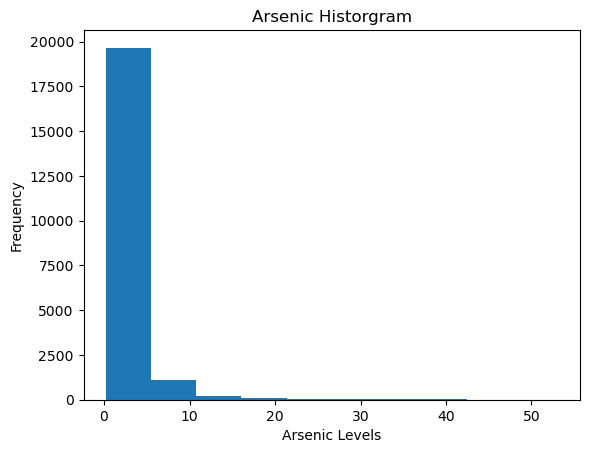

In [85]:
arsenic_data.head()

plt.hist(arsenic_data['max'])
plt.xlabel("Arsenic Levels")
plt.ylabel("Frequency")
plt.title('Arsenic Historgram')
plt.savefig('Charts/Arsenic/015_historgram.png', dpi=300, bbox_inches = "tight")
plt.show()

In [86]:
# Comparisons 
ars_pov_df = arsenic_trimmed[['year','countyServed','max']]

ars_pov_df

ars_pov_df = ars_pov_df.rename(columns = {'year':'Year',
                                            'countyServed':'County'})
ars_pov_df

pov2 = poverty_filter_df[['Year','County','Poverty Rate','County Type']]
pov2
ars_v_pov = ars_pov_df.merge(pov2,how = 'inner', on = ['Year','County'])
ars_v_pov


,Year,County,max,Poverty Rate,County Type
0,2010,Aitkin,5.82,13.55,Rural
1,2010,Anoka,12.60,6.41,Urban
2,2010,Becker,15.70,11.23,Rural
3,2010,Beltrami,5.56,19.94,Rural
4,2010,Benton,2.61,11.84,Urban
...,...,...,...,...,...
939,2021,Watonwan,3.76,13.03,Rural
940,2021,Wilkin,5.54,13.53,Rural
941,2021,Winona,2.96,13.44,Rural
942,2021,Wright,8.14,4.89,Urban


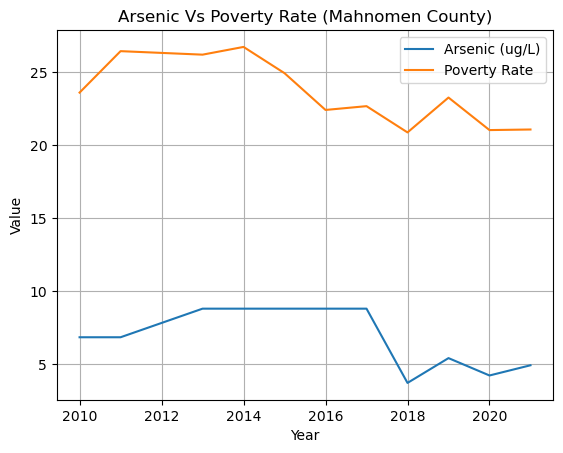

In [87]:
# plot code

# 2 min, 2 max, -- Poverty level

# Highest Poverty by Mean (2010-2021)
# Mahnomen, Beltrami, Blue Earth, Wadena, Clearwater

# Lowest Poverty by Mean (2010-2021)
# Carver, Washington, Scott, Wright, Dodge
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars = ars_v_pov[ars_v_pov['County']=='Mahnomen']['max']
ars_pov_rate = ars_v_pov[ars_v_pov['County']=='Mahnomen']['Poverty Rate']

plt.plot(ars_pov_year, ars_pov_ars, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Mahnomen County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/005_mahnomen_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

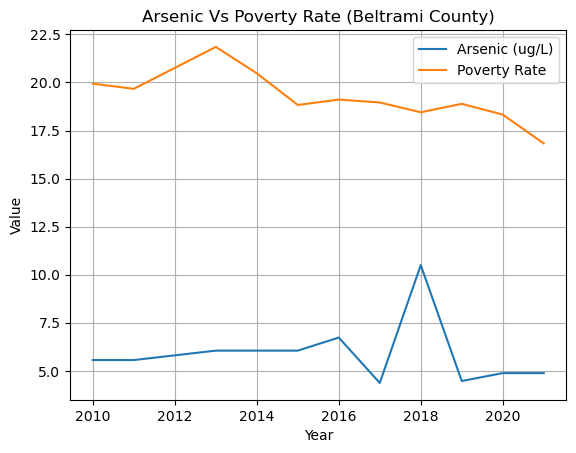

In [88]:
# 
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars2 = ars_v_pov[ars_v_pov['County']=='Beltrami']['max']
ars_pov_rate2 = ars_v_pov[ars_v_pov['County']=='Beltrami']['Poverty Rate']

plt.plot(ars_pov_year, ars_pov_ars2, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate2, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Beltrami County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/006_beltrami_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

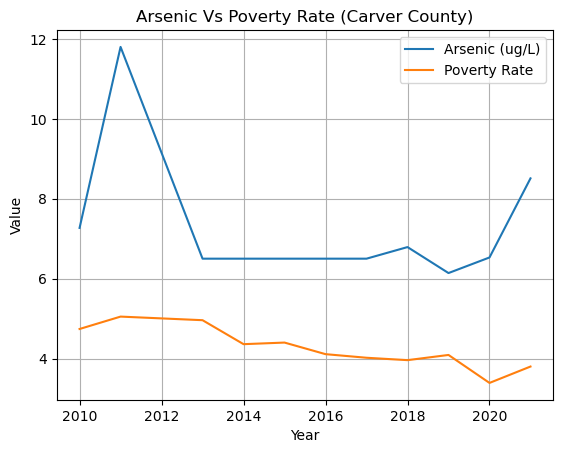

In [89]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars3 = ars_v_pov[ars_v_pov['County']=='Carver']['max']
ars_pov_rate3 = ars_v_pov[ars_v_pov['County']=='Carver']['Poverty Rate']

plt.plot(ars_pov_year, ars_pov_ars3, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate3, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Carver County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/007_carver_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

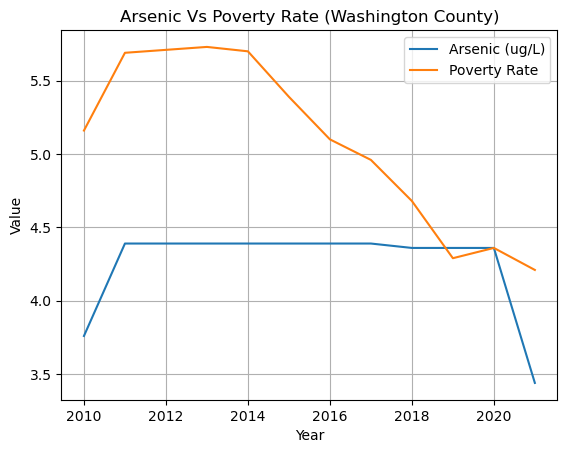

In [90]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars4 = ars_v_pov[ars_v_pov['County']=='Washington']['max']
ars_pov_rate4 = ars_v_pov[ars_v_pov['County']=='Washington']['Poverty Rate']

plt.plot(ars_pov_year, ars_pov_ars4, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate4, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Washington County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/008_washington_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

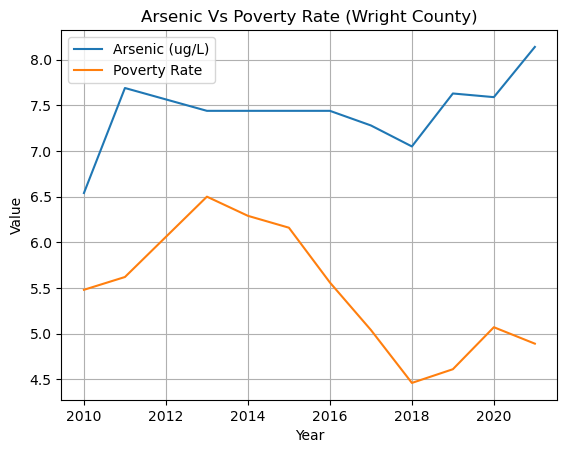

In [91]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars5 = ars_v_pov[ars_v_pov['County']=='Wright']['max']
ars_pov_rate5 = ars_v_pov[ars_v_pov['County']=='Wright']['Poverty Rate']

plt.plot(ars_pov_year, ars_pov_ars5, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate5, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Wright County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/009_wright_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

#### Poverty Rate is above Arsenic Value in counties with highest poverty rate

#### Arsenic Value is above Poverty Rate in counties with lowest poverty rate

#### Conclude: Counties with high poverty rate will have lower levels of Arsenic

In [92]:
high_pov_rate = poverty_filter_df[(poverty_filter_df['Poverty Rate'] >= 14)]
low_pov_rate = poverty_filter_df[(poverty_filter_df['Poverty Rate'] <= 8)]

# Rename arsenic columns to match poverty columns
arsenal = arsenic_trimmed.rename(columns = {'year':'Year',
                              'countyServed':'County'})
arsenal

# High Poverty rate counties merge with Arsenic data (> 15%)

high_pov_arsenal = high_pov_rate.merge(arsenal, how='inner', on = ['Year','County'])
high_pov_arsenal

# Low Poverty rate counties merge with Arsenic data (<= 15%)
low_pov_arsenal = low_pov_rate.merge(arsenal, how='inner', on = ['Year','County'])
low_pov_arsenal

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (White Alone),Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),max
0,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,5.28,22.62,15.98,6.71,0.00,23.09,11.45,5.13,16.39,12.60
1,2010,Carver,Urban,88071.0,4172.0,1668.0,2504.0,4.74,1.89,2.84,...,3.69,17.09,19.81,3.57,0.00,46.12,15.20,3.61,25.01,7.27
2,2010,Chisago,Urban,50585.0,3594.0,1398.0,2196.0,7.10,2.76,4.34,...,6.89,4.55,4.63,22.93,0.00,8.47,15.71,6.95,6.12,5.50
3,2010,Dakota,Urban,391308.0,21768.0,10087.0,11681.0,5.56,2.58,2.99,...,4.31,23.52,9.42,4.38,5.56,17.22,8.02,4.01,15.14,14.80
4,2010,Dodge,Urban,19682.0,1204.0,525.0,679.0,6.12,2.67,3.45,...,6.17,0.00,0.00,9.09,0.00,0.00,5.21,5.91,10.67,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021,Sherburne,Urban,94130.0,4722.0,1831.0,2891.0,5.02,1.95,3.07,...,3.79,16.34,56.52,8.52,0.00,10.91,20.44,3.75,4.68,2.88
176,2021,Sibley,Rural,14821.0,1179.0,494.0,685.0,7.95,3.33,4.62,...,7.94,1.48,15.38,0.00,0.00,5.38,15.01,6.78,19.34,42.00
177,2021,Wabasha,Urban,21212.0,1503.0,742.0,761.0,7.09,3.50,3.59,...,6.48,2.06,18.33,25.78,0.00,51.15,7.55,5.96,37.73,1.10
178,2021,Washington,Urban,261262.0,11010.0,5103.0,5907.0,4.21,1.95,2.26,...,3.64,10.21,26.10,4.06,8.21,8.90,7.01,3.52,8.53,3.44


     Year      County County Type  Sample Population  Poverty Population  \
0    2010    Beltrami       Rural            42043.0              8383.0   
1    2010  Blue Earth       Rural            59729.0             11331.0   
2    2010  Clearwater       Rural             8341.0              1296.0   
3    2010    Mahnomen       Rural             5254.0              1240.0   
4    2010       Mower       Rural            38332.0              5467.0   
..    ...         ...         ...                ...                 ...   
130  2020      Wadena       Rural            13333.0              1949.0   
131  2021    Beltrami       Rural            43999.0              7406.0   
132  2021  Blue Earth       Rural            65213.0             10657.0   
133  2021        Clay       Urban            61584.0              8654.0   
134  2021    Mahnomen       Rural             5288.0              1114.0   

     Male Poverty  Female Poverty  Poverty Rate  Male Poverty Rate  \
0          3855.0

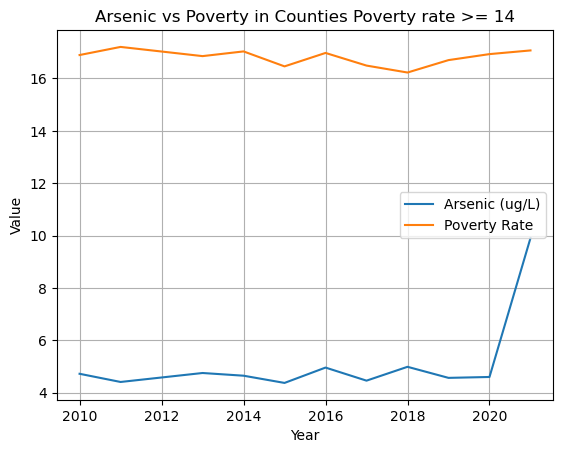

In [93]:

print(high_pov_arsenal)
high_pov_ars_year = high_pov_arsenal['Year'].unique()
high_pov_ars_value = high_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
high_pov_rate = high_pov_arsenal[['Year','Poverty Rate']].groupby('Year')['Poverty Rate'].mean()


plt.plot(high_pov_ars_year, high_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(high_pov_ars_year, high_pov_rate, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic vs Poverty in Counties Poverty rate >= 14')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/010_high_poverty_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

     Year      County County Type  Sample Population  Poverty Population  \
0    2010       Anoka       Urban           323359.0             20730.0   
1    2010      Carver       Urban            88071.0              4172.0   
2    2010     Chisago       Urban            50585.0              3594.0   
3    2010      Dakota       Urban           391308.0             21768.0   
4    2010       Dodge       Urban            19682.0              1204.0   
..    ...         ...         ...                ...                 ...   
175  2021   Sherburne       Urban            94130.0              4722.0   
176  2021      Sibley       Rural            14821.0              1179.0   
177  2021     Wabasha       Urban            21212.0              1503.0   
178  2021  Washington       Urban           261262.0             11010.0   
179  2021      Wright       Urban           138525.0              6767.0   

     Male Poverty  Female Poverty  Poverty Rate  Male Poverty Rate  \
0          8994.0

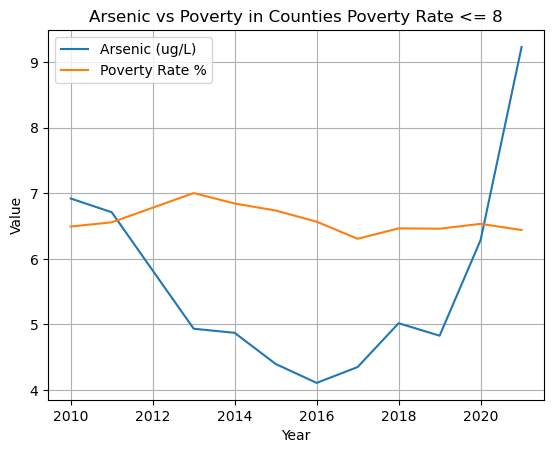

In [94]:
# Low poverty graph
print(low_pov_arsenal)
low_pov_ars_year = low_pov_arsenal['Year'].unique()
low_pov_ars_value = low_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
low_pov_rate = low_pov_arsenal[['Year','Poverty Rate']].groupby('Year')['Poverty Rate'].mean()


plt.plot(low_pov_ars_year, low_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(low_pov_ars_year, low_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic vs Poverty in Counties Poverty Rate <= 8')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/011_low_poverty_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

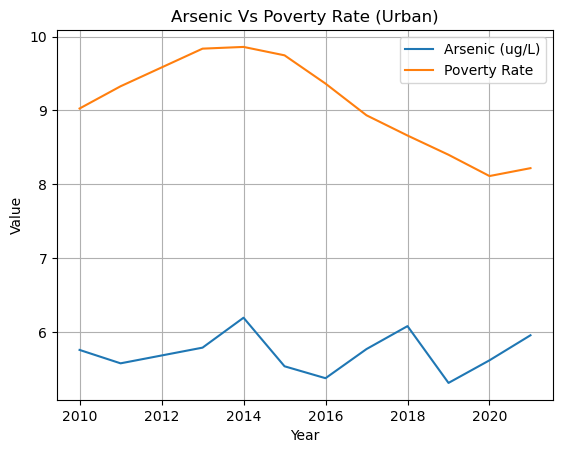

In [95]:
# Urban Vs Rural --- Pov vs Arsenic

# Urban and Rural DF
urban_ars_pov = poverty_filter_df[(poverty_filter_df['County Type'] == 'Urban')]
rural_ars_pov = poverty_filter_df[(poverty_filter_df['County Type'] == 'Rural')]

# Urban and Rural merge with Arsenic DF
urban_pov_arsenal = urban_ars_pov.merge(arsenal, how='inner', on = ['Year','County'])
rural_pov_arsenal = rural_ars_pov.merge(arsenal, how='inner', on = ['Year','County'])

# Urban Plot Graph
urban_pov_ars_year = urban_pov_arsenal['Year'].unique()
urban_pov_ars_value = urban_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
urban_pov_rate = urban_pov_arsenal[['Year','Poverty Rate']].groupby('Year')['Poverty Rate'].mean()


plt.plot(urban_pov_ars_year, urban_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(urban_pov_ars_year, urban_pov_rate, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Urban)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/012_urban_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

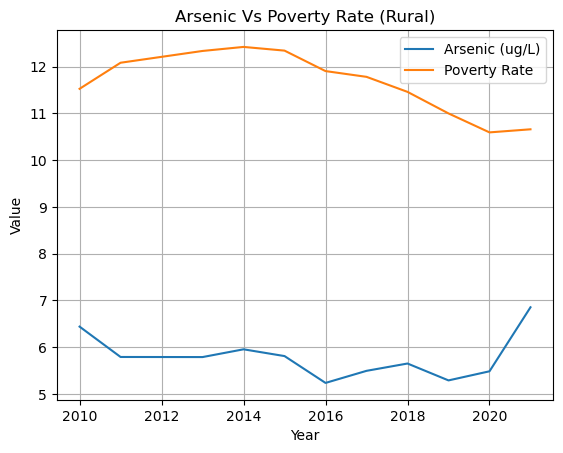

In [96]:
rural_pov_ars_year = rural_pov_arsenal['Year'].unique()
rural_pov_ars_value = rural_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
rural_pov_rate = rural_pov_arsenal[['Year','Poverty Rate']].groupby('Year')['Poverty Rate'].mean()


plt.plot(rural_pov_ars_year, rural_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(rural_pov_ars_year, rural_pov_rate, label = 'Poverty Rate')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Rural)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Charts/Arsenic/013_rural_arsenic.png", dpi=300, bbox_inches = "tight")
plt.show()

#### Urban vs Rural shows nothing really significant
#### Rural Arsenic value ~ 5.8
#### Urban Arsenic value ~ 5.8

In [97]:
arsenal
poverty_filter_df

pov_ars = arsenal.merge(poverty_filter_df,how = 'inner',on = ['Year','County'])

pov_ars['Poverty Rate']
pov_ars['max']



0       5.82
1      12.60
2      15.70
3       5.56
4       2.61
       ...  
939     3.76
940     5.54
941     2.96
942     8.14
943    17.70
Name: max, Length: 944, dtype: float64

The r-squared is: 1.0264094323745626e-05


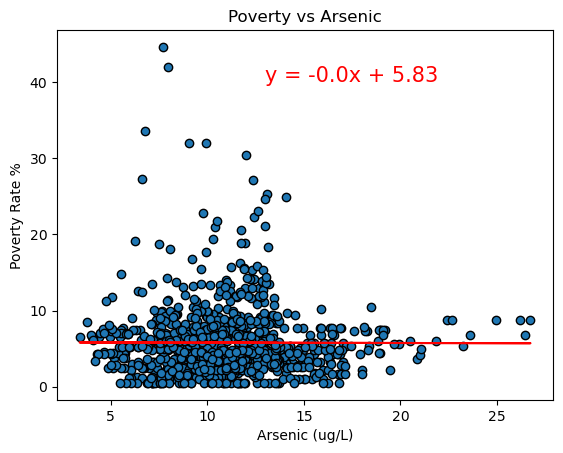

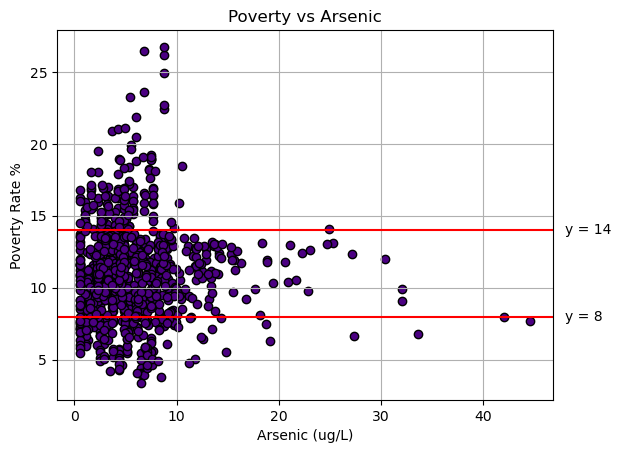

In [100]:
# Linear regression on Arsenic and Poverty
x_pov = pov_ars['Poverty Rate']
x_ars = pov_ars['max']
x_label = 'Arsenic (ug/L)'
y_label = 'Poverty Rate %'
x_range = (0, 30)
y_range = (0, 50)
ann_pos = (13, 40)
title = "Poverty vs Arsenic"
output_file = 'Charts/Arsenic/014_arsenic_linear_regression.png'
lrp_function(x_pov, x_ars, x_label, y_label, ann_pos, output_file, title)
#Scatter Plot Arsenic Poverty Counties


arsenal
poverty_filter_df

pov_ars = arsenal.merge(poverty_filter_df,how = 'inner',on = ['Year','County'])
pov_ars

# Create X,Y variables for scatterplot
x_pov = pov_ars['Poverty Rate']
x_ars = pov_ars['max']

plt.scatter(x_ars, x_pov, marker="o", facecolors="indigo", edgecolors="black")
plt.axhline(y = 8, color = 'red', linestyle = '-')
plt.axhline(y = 14, color = 'red', linestyle = '-')
plt.grid()
plt.title('Poverty vs Arsenic')
plt.xlabel('Arsenic (ug/L)')
plt.text(48, 14, 'y = 14', ha='left', va='center')
plt.ylabel('Poverty Rate %')
plt.text(48, 8, 'y = 8', ha='left', va='center')
output_file = 'Charts/Arsenic/014_arsenic_linear_regression.png'
plt.show()

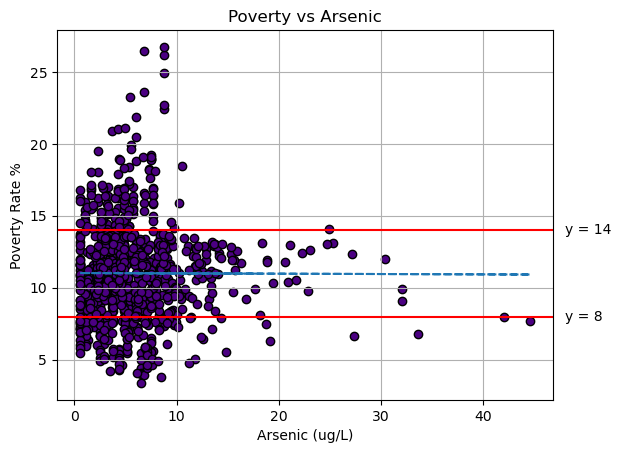

In [102]:

#plot max Arsenic vs poverty
plt.scatter(x_ars, x_pov, marker="o", facecolors="indigo", edgecolors="black")
plt.axhline(y = 8, color = 'red', linestyle = '-')
plt.axhline(y = 14, color = 'red', linestyle = '-')
plt.grid()
plt.title('Poverty vs Arsenic')
plt.xlabel('Arsenic (ug/L)')
plt.text(48, 14, 'y = 14', ha='left', va='center')
plt.ylabel('Poverty Rate %')
plt.text(48, 8, 'y = 8', ha='left', va='center')
output_file = 'Charts/Arsenic/015_arsenic_linear_regression.png'

# Adding Regression line
pa_slope, pa_int, pa_r, pa_p, pa_std_err = stats.linregress(x_ars, x_pov)
pa_fit = pa_slope * x_ars + pa_int
plt.plot(x_ars,pa_fit,"--")

plt.show()

In [103]:
# Calculate the total number of counties
county_count = len(arsenic_df["countyServed"].unique())
county_count

87

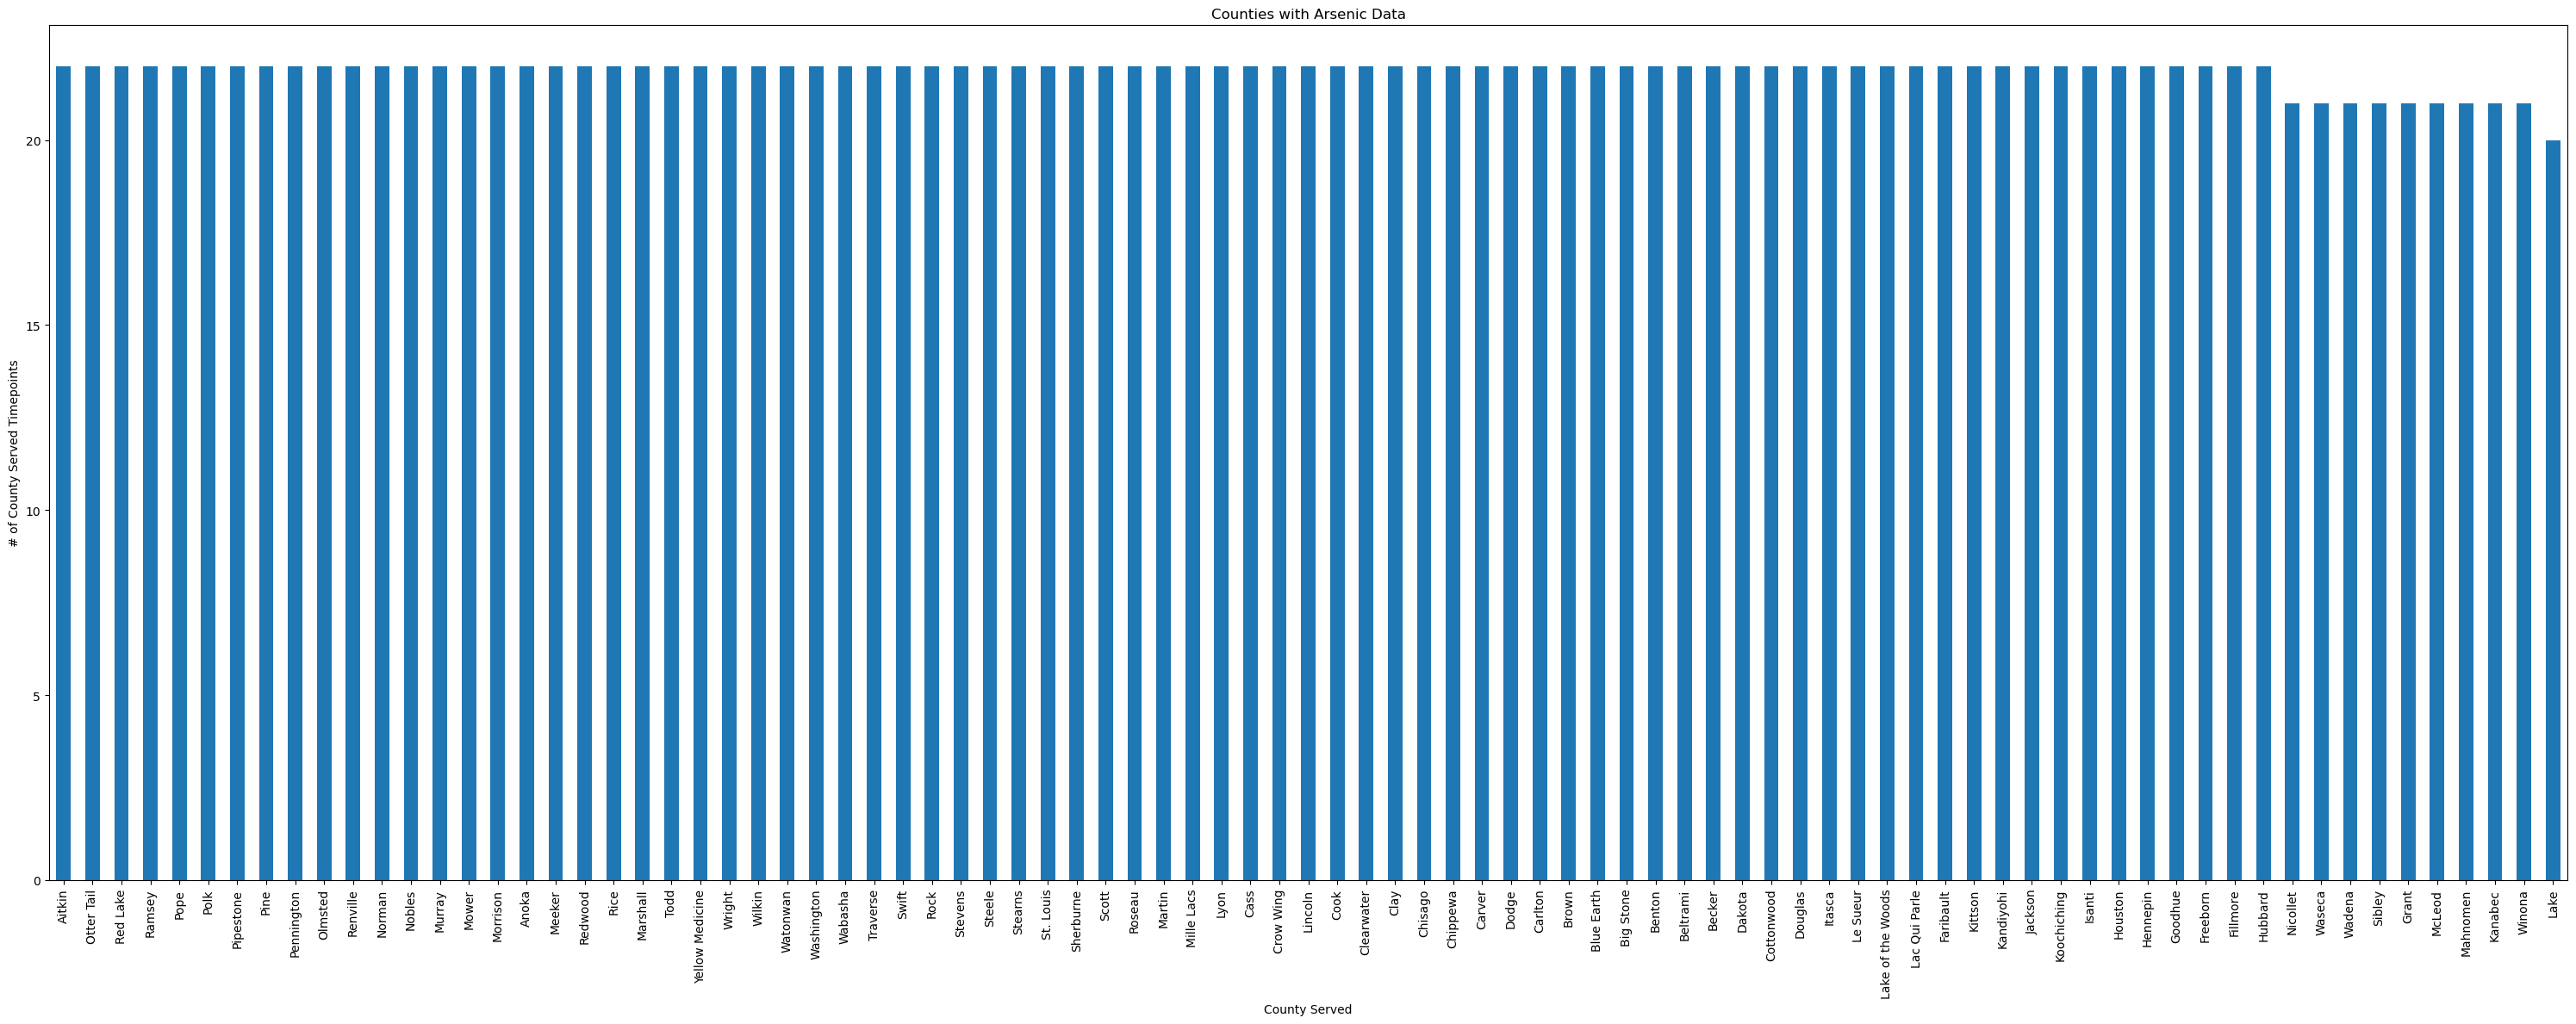

In [104]:
plt.figure(figsize=(30, 12))

observed_county = arsenic_df["countyServed"].value_counts()
observed_county.plot.bar(color='tab:blue') 
plt.xlabel("County Served")
plt.ylabel("# of County Served Timepoints")
plt.title('Counties with Arsenic Data')
plt.tight_layout()
plt.savefig('Charts/Arsenic/002_counties.png',dpi=300, bbox_inches = "tight")
plt.show()

In [105]:
# Find the common years
common_years = set(poverty_df['Year']).intersection(lead_df['year'])

# Filter both DataFrames to include only the common years
filtered_poverty_df = poverty_df[poverty_df['Year'].isin(common_years)]
filtered_lead_df = lead_df[lead_df['year'].isin(common_years)]

# Perform the merge on the filtered DataFrames
poverty_lead_df = pd.merge(filtered_poverty_df, filtered_lead_df, left_on=['County', 'Year'], right_on=['location', 'year'], how='inner')

poverty_lead_df = poverty_lead_df[poverty_lead_df['unstable'] != True]

poverty_lead_df.head()

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,ageGroup,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12
78,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18638.0,76.0,46098.0,40.4,False,NaN
80,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<6 years,>10 mcg/dL (historic reference level),0.4,27053.0,22063.0,95.0,91316.0,24.2,False,NaN
183,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<3 years,>10 mcg/dL (historic reference level),0.5,27123.0,10398.0,49.0,21375.0,48.6,False,NaN
185,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<6 years,>10 mcg/dL (historic reference level),0.5,27123.0,11824.0,63.0,41811.0,28.3,False,NaN
339,1124293.0,138258.0,73852.0,6581.0,1335.0,6466.0,2784.0,1023.0,2160.0,14161.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18259.0,68.0,46675.0,39.1,False,NaN


In [106]:
city_count_per_county = water_arsenic_df.groupby('countyServed')['cityServed'].nunique()
city_count_per_county

county_count = len(arsenic_df["countyServed"].unique())
county_count

87

In [107]:
data_complete = pd.merge(poverty_lead_df, arsenic_df, how="left", on=["year", "year"])
data_complete

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0,countyServed,max arsenic (ug/L)
0,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,861.0,Aitkin,5.82
1,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,862.0,Anoka,12.60
2,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,863.0,Becker,15.70
3,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,864.0,Beltrami,5.56
4,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,865.0,Benton,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1811.0,Watonwan,3.76
3820,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1812.0,Wilkin,5.54
3821,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1813.0,Winona,2.96
3822,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0,Wright,8.14


In [108]:
great_max_df = data_complete.groupby(["countyServed"])["max arsenic (ug/L)"].max()
great_max_df = great_max_df.reset_index()

merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left")
merge_group_df.head()

,countyServed,max arsenic (ug/L),Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,...,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0
0,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,16805.0,30.0,46388.0,36.2,False,NaN,1642.0
1,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,18140.0,37.0,94305.0,19.2,False,NaN,1642.0
2,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9058.0,23.0,21720.0,41.7,False,NaN,1642.0
3,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9828.0,33.0,43959.0,22.4,False,NaN,1642.0
4,Aitkin,6.63,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1729.0


In [109]:
idx = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[idx, ["countyServed", "max arsenic (ug/L)"]]
# Assuming 'data_complete' is your original DataFrame
# Replace "YourColumnName" with the actual column name you want to find the maximum for
great_max_df = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[great_max_df, ["countyServed", "max arsenic (ug/L)"]]

# Merge the DataFrames using the 'merge' function
merge_group_df = pd.merge(data_complete, great_max_df, on=["countyServed", "max arsenic (ug/L)"], how="inner")

# Display the result
merge_group_df


,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0,countyServed,max arsenic (ug/L)
0,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,862.0,Anoka,12.60
1,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,22063.0,95.0,91316.0,24.2,False,NaN,862.0,Anoka,12.60
2,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,27123.0,10398.0,49.0,21375.0,48.6,False,NaN,862.0,Anoka,12.60
3,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,27123.0,11824.0,63.0,41811.0,28.3,False,NaN,862.0,Anoka,12.60
4,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,863.0,Becker,15.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1814.0,Wright,8.14
1033,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0,Wright,8.14
1034,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1815.0,Yellow Medicine,17.70
1035,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1815.0,Yellow Medicine,17.70


In [110]:
idx = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[idx, ["countyServed", "max arsenic (ug/L)"]]
merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left")
merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left", suffixes=('_max', '_original'))

merge_group_df


,countyServed,max arsenic (ug/L),Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,...,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0
0,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,16805.0,30.0,46388.0,36.2,False,NaN,1642.0
1,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,18140.0,37.0,94305.0,19.2,False,NaN,1642.0
2,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9058.0,23.0,21720.0,41.7,False,NaN,1642.0
3,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9828.0,33.0,43959.0,22.4,False,NaN,1642.0
4,Aitkin,6.63,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Wright,8.14,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1814.0
1033,Wright,8.14,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0
1034,Yellow Medicine,17.70,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1815.0
1035,Yellow Medicine,17.70,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1815.0


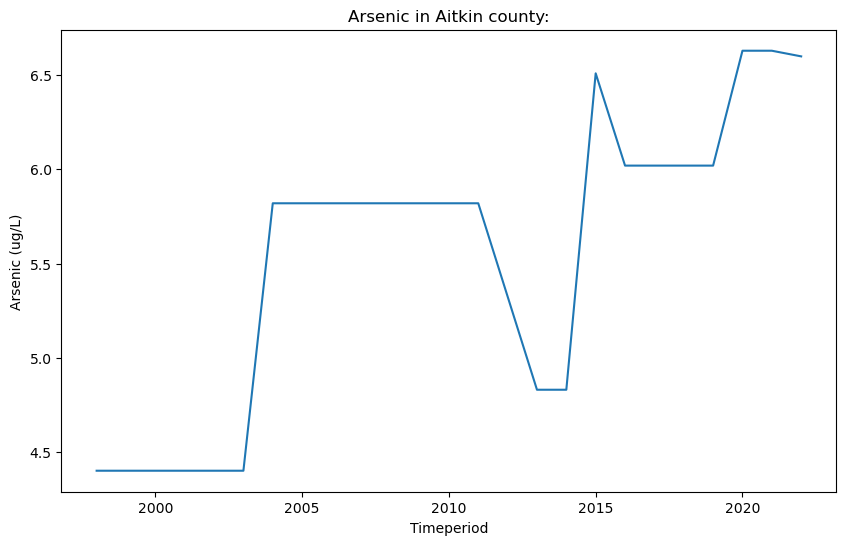

In [111]:
# Print Arsenic for any given county

county_id = 'Aitkin'
data = arsenic_df[arsenic_df["countyServed"] == county_id]
plt.figure(figsize=(10, 6))
plt.plot(data["year"], data["max arsenic (ug/L)"])
plt.xlabel("Timeperiod")
plt.ylabel("Arsenic (ug/L)")
plt.title(f'Arsenic in {county_id} county:')
plt.savefig('Charts/Arsenic/003_by_county_arsenic.png',dpi=300, bbox_inches = "tight")
plt.show()

In [112]:
# Calculate the max years
max_years_df = arsenic_df.loc[arsenic_df.groupby('countyServed')['max arsenic (ug/L)'].idxmax()]
max_years_df

,Unnamed: 0,year,countyServed,max arsenic (ug/L)
1642,1642,2020,Aitkin,6.63
427,427,2004,Anoka,20.00
428,428,2004,Becker,29.20
1471,1471,2018,Beltrami,10.50
1733,1733,2021,Benton,2.75
...,...,...,...,...
334,334,2002,Watonwan,15.00
1551,1551,2018,Wilkin,6.56
1900,1900,2022,Winona,3.03
424,424,2003,Wright,24.10


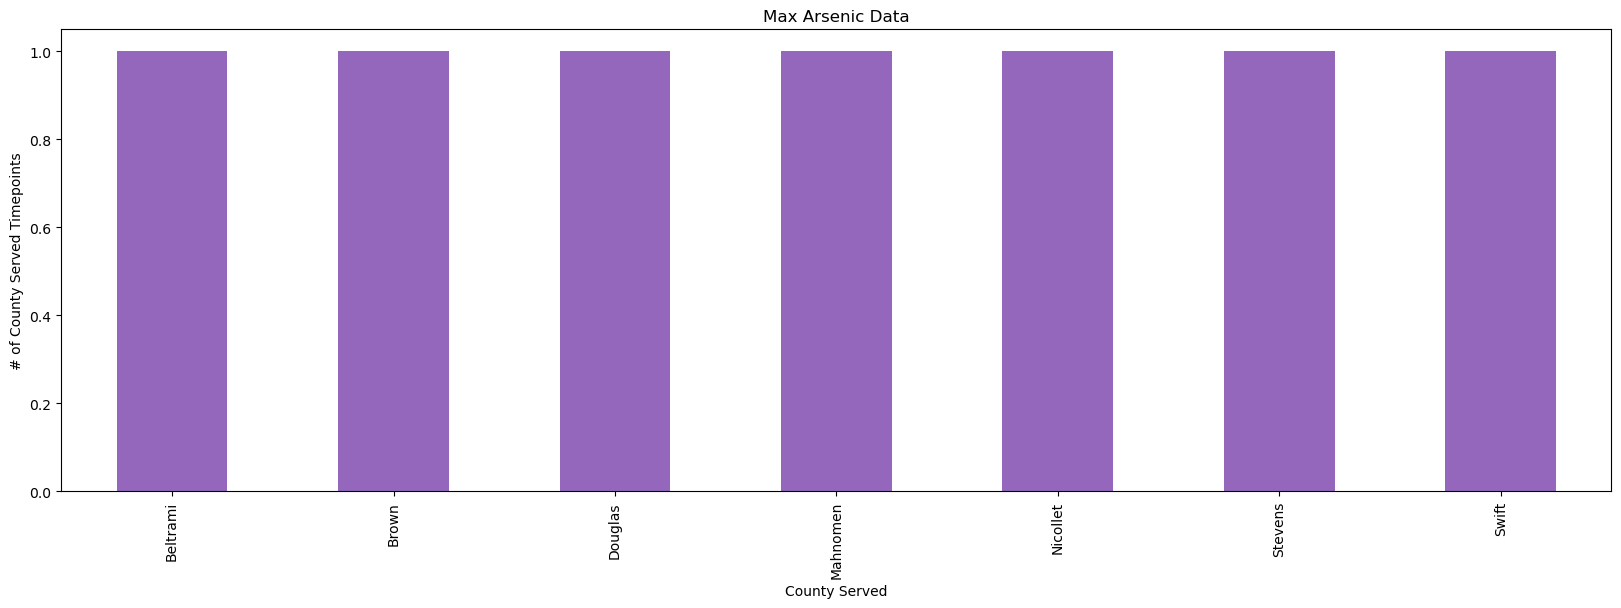

In [113]:
threshold = 10

# Filter the DataFrame to include only rows where 'value' is about 10
about_10_df = max_years_df[max_years_df['max arsenic (ug/L)'].between(threshold - 1, threshold + 1)]
about_10_df

plt.figure(figsize=(20, 6))

max_county = about_10_df["countyServed"].value_counts()
max_county.plot.bar(color='tab:purple') 
plt.xlabel("County Served")
plt.ylabel("# of County Served Timepoints")
plt.title('Max Arsenic Data')
plt.savefig('Charts/Arsenic/004_bar_maxes.png',dpi=300, bbox_inches = "tight")
plt.show()

Cannot support hypothesis that poverty rate impacts arsenic levels

# Heart Attacks

Hypothesis: As poverty rates increase, so will the rate of heart attacks

In [114]:
# Heart Attack Incidents by County
path_heart = Path("Resources/heart_attack_hospitalizations_by_county.csv")
heart_df = pd.read_csv(path_heart)
heart_df.head()

,fips,population,year,county,sex,age,ci,aci,rate,ageAdjust,count
0,27000,8346991,2008-2010,Minnesota,All,All Ages 35+ Combined ...,(30.5 - 31.2),(28.8 - 29.6),30.9,29.2,25751.0
1,27000,8584362,2011-2013,Minnesota,All,All Ages 35+ Combined ...,(28.8 - 29.6),(26.4 - 27.0),29.2,26.7,25070.0
2,27000,8762674,2013-2015,Minnesota,All,All Ages 35+ Combined ...,(28.6 - 29.3),(25.8 - 26.4),29.0,26.1,25404.0
3,27000,8936064,2015-2017,Minnesota,ALL,All Ages 35+ Combined ...,(0.0 - 0.0),(0.0 - 0.0),29.8,26.5,26626.0
4,27000,9031469,2016-2018,Minnesota,All,All Ages 35+ Combined ...,(29.5 - 30.2),(26.1 - 26.7),29.9,26.4,26995.0


In [115]:
# Convert 'year' column to string

heart_df['year'] = heart_df['year'].astype(str)

# Function to split years into individual years and average the heart attack the count
# Used ChatGPT to help build a function to split up the years because our code wasn't working

def distribute_count(row):
    try:
        start_year, end_year = map(int, row['year'].split('-'))
        year_range = end_year - start_year + 1
        count_per_year = row['count'] / year_range
        years = list(range(start_year, end_year + 1))
        counts = [count_per_year] * year_range
        return pd.DataFrame({'county': [row['county']] * year_range, 'year': years, 'count': counts})
    except (ValueError, AttributeError):
        return pd.DataFrame()

# Apply the function to each row and concatenate the results
heart_clean_df = pd.concat(heart_df.apply(distribute_count, axis=1).tolist(), ignore_index=True)

# Display the resulting DataFrame
heart_clean_df

,county,year,count
0,Minnesota,2008,8583.666667
1,Minnesota,2009,8583.666667
2,Minnesota,2010,8583.666667
3,Minnesota,2011,8356.666667
4,Minnesota,2012,8356.666667
...,...,...,...
1843,Yellow Medicine,2018,18.213333
1844,Yellow Medicine,2019,18.213333
1845,Yellow Medicine,2018,20.283333
1846,Yellow Medicine,2019,20.283333


In [116]:
# Heart Death Data
# Referenced code from https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-in-a-dataframe-column

path_heart_death = Path("Resources/cdc_heart_deaths.csv")
heart_death_df = pd.read_csv(path_heart_death, low_memory=False)

#filter to MN
heart_death_df = heart_death_df.loc[heart_death_df['LocationAbbr'] == 'MN']
heart_death_df = heart_death_df.loc[(heart_death_df['YearStart'] > 2009) & (heart_death_df['YearStart'] < 2022)]
heart_death_df['Data_Value'] = heart_death_df['Data_Value'].fillna(0)
heart_death_df.head()

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
10860,NVSS~2010~27~NV001~OVR01~Age-Standardized,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)
10861,NVSS~2010~27~NV001~OVR01~Crude,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)
10862,NVSS~2010~27~NV001~GEN01~Crude,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,NV001,Crude,BOC02,GEN01,27,POINT (-94.7942005 46.35564874)
10863,NVSS~2010~27~NV001~GEN01~Age-Standardized,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,NV001,AgeStdz,BOC02,GEN01,27,POINT (-94.7942005 46.35564874)
10864,NVSS~2010~27~NV001~GEN02~Age-Standardized,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Female,C1,T1,NV001,AgeStdz,BOC02,GEN02,27,POINT (-94.7942005 46.35564874)


In [117]:
# Merge the poverty data with the heart attacks by county data
poverty_heart_df = pd.merge(
    poverty_rate_df, 
    heart_clean_df, 
    left_on=['Year', 'County'],  
    right_on=['year', 'county'],  
    how='inner',

)

# Clean up duplicated columns and rename for readability 
poverty_heart_df = poverty_heart_df.drop('county', axis=1)
poverty_heart_df = poverty_heart_df.drop('year', axis=1)
poverty_heart_df.rename(columns = {'count':'Heart Attack Count'}, inplace = True)

# Filling in the blanks with zeros in order to graph the data properly
poverty_heart_df['Heart Attack Count'] = poverty_heart_df['Heart Attack Count'].fillna(0)
# poverty_heart_df['Poverty Population'] = poverty_heart_df['Poverty Population'].fillna(0)
# poverty_heart_df['Male Poverty'] = poverty_heart_df['Male Poverty'].fillna(0)
# poverty_heart_df['Female Poverty'] = poverty_heart_df['Female Poverty'].fillna(0)
# poverty_heart_df['Sample Population'] = poverty_heart_df['Sample Population'].fillna(0)
# poverty_heart_df['Poverty Rate'] = poverty_heart_df['Poverty Rate'].fillna(0)

# Need to make a column for heart attack %
poverty_heart_df['Heart Attack %'] = (poverty_heart_df['Heart Attack Count'] / poverty_heart_df['Sample Population']) * 100
poverty_heart_df['Heart Attack %'] = poverty_heart_df['Heart Attack %'].fillna(0)

poverty_heart_df

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Heart Attack Count,Heart Attack %
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,14.29,45.60,16.07,0.0,79.69,33.04,12.22,44.12,62.666667,0.388534
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39,380.666667,0.117723
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,34.65,33.07,17.46,0.0,27.40,22.97,8.90,33.03,102.333333,0.323389
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,25.84,50.21,15.30,0.0,17.92,31.26,11.75,28.80,95.666667,0.227545
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,42.88,42.64,9.02,0.0,14.81,50.08,9.95,45.33,56.333333,0.150580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2020,Watonwan,Rural,10771.0,1366.0,568.0,798.0,12.68,5.27,7.41,...,0.00,0.00,8.84,0.0,19.33,9.16,9.71,21.53,20.633333,0.191564
1649,2020,Wilkin,Rural,6142.0,633.0,285.0,348.0,10.31,4.64,5.67,...,0.00,0.00,0.00,0.0,79.45,50.41,8.25,50.51,23.393333,0.380875
1650,2020,Winona,Rural,47140.0,6268.0,2947.0,3321.0,13.30,6.25,7.04,...,20.09,57.14,18.17,0.0,23.68,12.17,12.86,20.28,35.600000,0.075520
1651,2020,Wright,Urban,135007.0,6841.0,3029.0,3812.0,5.07,2.24,2.82,...,4.78,8.47,9.18,0.0,10.62,18.59,4.59,13.72,195.720000,0.144970


In [118]:
# used code from: https://www.youtube.com/watch?v=xi0vhXFPegw&t=2131s

df_corr = poverty_heart_df[["Sample Population", "Poverty Population",
                            "Male Poverty Rate", "Female Poverty Rate",
                            "Child Poverty Rate", "Senior Poverty Rate", "Heart Attack %"
                           ]].dropna().corr()
df_corr

,Sample Population,Poverty Population,Male Poverty Rate,Female Poverty Rate,Child Poverty Rate,Senior Poverty Rate,Heart Attack %
Sample Population,1.000000,0.965323,-0.030755,-0.082429,-0.032374,-0.282324,-0.145332
Poverty Population,0.965323,1.000000,0.104626,0.061629,0.067836,-0.191091,-0.127105
Male Poverty Rate,-0.030755,0.104626,1.000000,0.856474,0.758567,0.415455,0.172857
Female Poverty Rate,-0.082429,0.061629,0.856474,1.000000,0.800065,0.487069,0.167288
Child Poverty Rate,-0.032374,0.067836,0.758567,0.800065,1.000000,0.350893,0.203845
Senior Poverty Rate,-0.282324,-0.191091,0.415455,0.487069,0.350893,1.000000,0.164469
Heart Attack %,-0.145332,-0.127105,0.172857,0.167288,0.203845,0.164469,1.000000


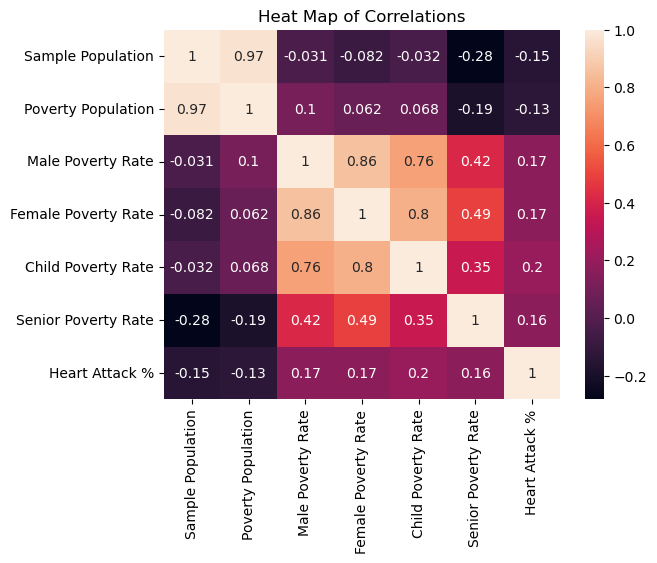

In [119]:
# used code from: https://www.youtube.com/watch?v=xi0vhXFPegw&t=2131s
# also used code from https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file
# also from here: https://stackoverflow.com/questions/45239261/savefig-text-chopped-off

sns.heatmap(df_corr, annot=True)
plt.title('Heat Map of Correlations')
plt.savefig('Charts/Heart/000_heat_heart_poverty.png',dpi=300, bbox_inches = "tight")
plt.show()

% of People in Poverty vs % of Heart Attacks:

The r-squared is: 0.031130185024867918


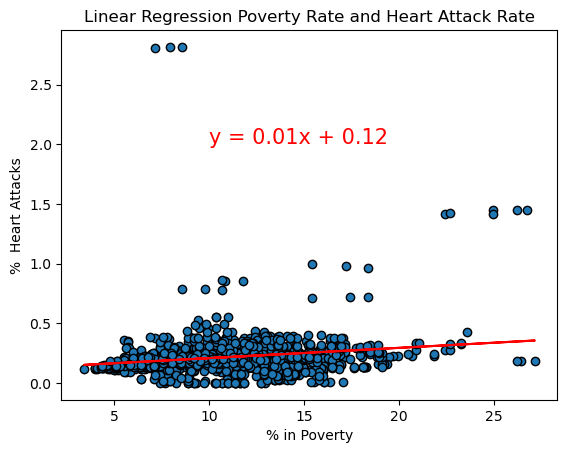

In [120]:
# Linear regression on Heart Attacks and Poverty
x_values = poverty_heart_df['Poverty Rate']
y_values = poverty_heart_df['Heart Attack %']

x_label = '% in Poverty'
y_label = '%  Heart Attacks'
x_range = (0, 200000)
y_range = (0, 1700)
ann_pos = (10,2)
title = "Linear Regression Poverty Rate and Heart Attack Rate"
output_file = 'Charts/Heart/001_heart_attacks_linear_regression.png'
print('% of People in Poverty vs % of Heart Attacks:')
print('')
# Save the plot to Output Folder
lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file, title)


In [121]:
# Was getting odd results so followed code from this site to further test:
# https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/

poverty_heart_stats = poverty_heart_df.groupby('Poverty Rate')['Heart Attack %'].describe()
poverty_heart_stats
sorted_poverty_heart_stats = poverty_heart_stats.sort_values(by='mean', ascending=False)
sorted_poverty_heart_stats

,count,mean,std,min,25%,50%,75%,max
Poverty Rate,,,,,,,,
7.94,2.0,1.508671,1.844448,0.204450,0.856561,1.508671,2.160782,2.812893
26.73,1.0,1.449275,NaN,1.449275,1.449275,1.449275,1.449275,1.449275
24.93,2.0,1.429253,0.024153,1.412174,1.420713,1.429253,1.437792,1.446332
17.20,1.0,0.980816,NaN,0.980816,0.980816,0.980816,0.980816,0.980816
22.41,2.0,0.845781,0.808403,0.274154,0.559967,0.845781,1.131594,1.417408
...,...,...,...,...,...,...,...,...
14.10,2.0,0.054390,0.047523,0.020786,0.037588,0.054390,0.071192,0.087994
13.86,2.0,0.049162,0.028519,0.028997,0.039080,0.049162,0.059245,0.069328
13.47,2.0,0.023723,0.001170,0.022896,0.023310,0.023723,0.024137,0.024550


In [122]:
stats.levene(poverty_heart_df['Poverty Rate'], poverty_heart_df['Heart Attack %'])

LeveneResult(statistic=2100.84759138291, pvalue=0.0)

<function matplotlib.pyplot.show(close=None, block=None)>

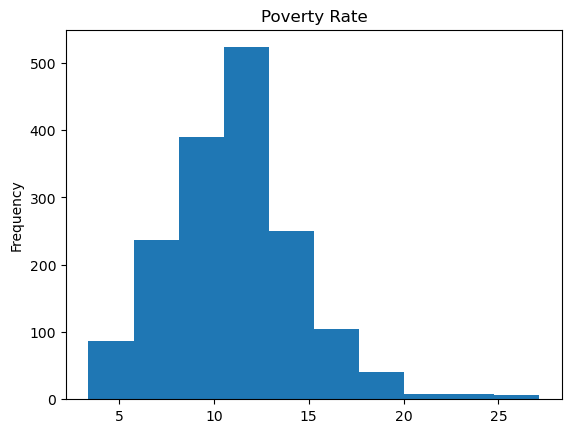

In [123]:
poverty_heart_df['Poverty Rate'].plot(kind="hist", title="Poverty Rate")
plt.xlabel("")
plt.savefig('Charts/Heart/002_poverty_distribution.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

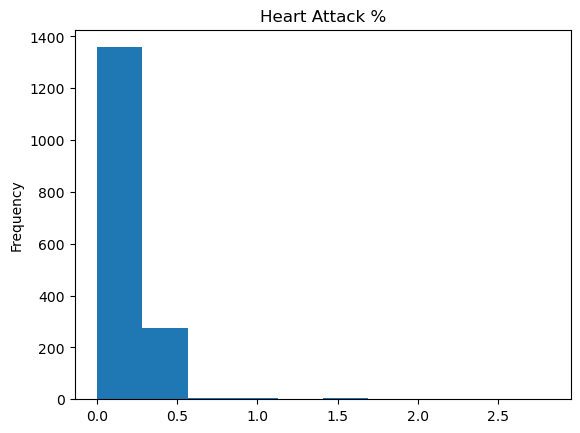

In [124]:
poverty_heart_df['Heart Attack %'].plot(kind="hist", title="Heart Attack %")
plt.xlabel("")
plt.savefig('Charts/Heart/003_heart_attack_distribution.png')
plt.show

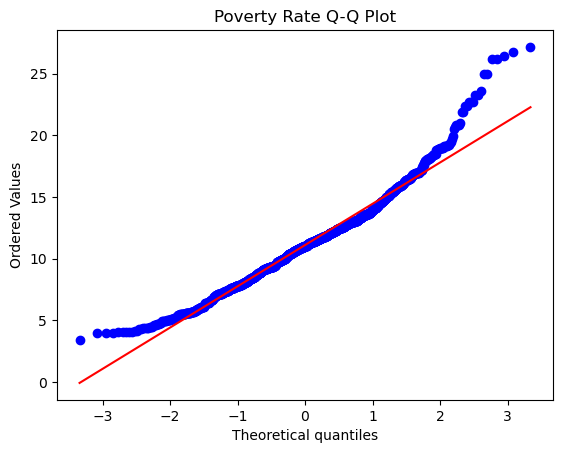

In [125]:
stats.probplot(poverty_heart_df['Poverty Rate'], dist="norm", plot= plt)
plt.title("Poverty Rate Q-Q Plot")
plt.savefig("Charts/Heart/003_poverty_qplot.png")

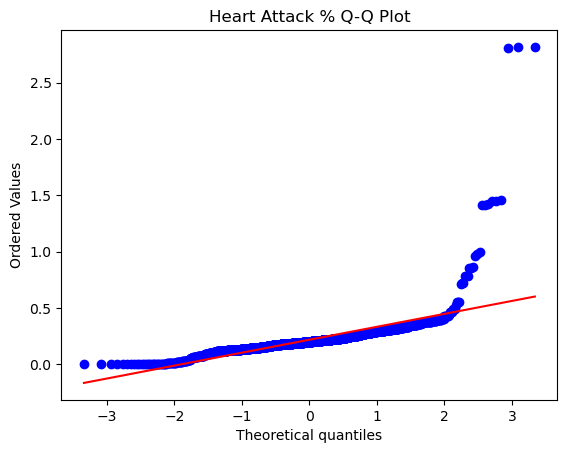

In [126]:
stats.probplot(poverty_heart_df['Heart Attack %'], dist="norm", plot= plt)
plt.title("Heart Attack % Q-Q Plot")
plt.savefig("Charts/Heart/004_heart_attack_qplot.png")

In [127]:
# Testing
stats.shapiro(poverty_heart_df['Poverty Rate'])


ShapiroResult(statistic=0.9700371026992798, pvalue=4.7293658611928395e-18)

In [128]:
stats.shapiro(poverty_heart_df['Heart Attack %'])


ShapiroResult(statistic=0.4842386841773987, pvalue=0.0)

The Heart Attack % is not normally distributed. Need to check the count to see if there's any difference

In [129]:
stats.shapiro(poverty_heart_df['Heart Attack Count'])


ShapiroResult(statistic=0.4323238134384155, pvalue=0.0)

Similar results

In [130]:
# T-Test Function:
# Partial code from in class but also had some trouble with the output so mixed with help from ChatGPT to fix errors

def t_test(df, col1, col2, output_file):
    # Extract the columns from the DataFrame
    data1 = df[col1]
    data2 = df[col2]

    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(data1, data2)

    # Scatter Plot
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(range(len(data1)), data1, label=col1)
    plt.scatter(range(len(data2)), data2, label=col2)
    plt.title('Poverty and Heart Rates Scatter Plot')
    plt.legend()

    # Histogram Plot
    plt.subplot(1, 2, 2)
    plt.hist(data1, 20, density=True, alpha=0.7, label=col1)
    plt.hist(data2, 20, density=True, alpha=0.7, label=col2)
    plt.axvline(data1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(data2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title('Poverty and Heart Rates Histogram Plot')
    plt.legend()

    plt.tight_layout()
    plt.savefig(output_file)

    plt.show()

    # Print the t-test results
    print(f'Test Statistic: {t_statistic}')
    print(f'P-value: {p_value}')


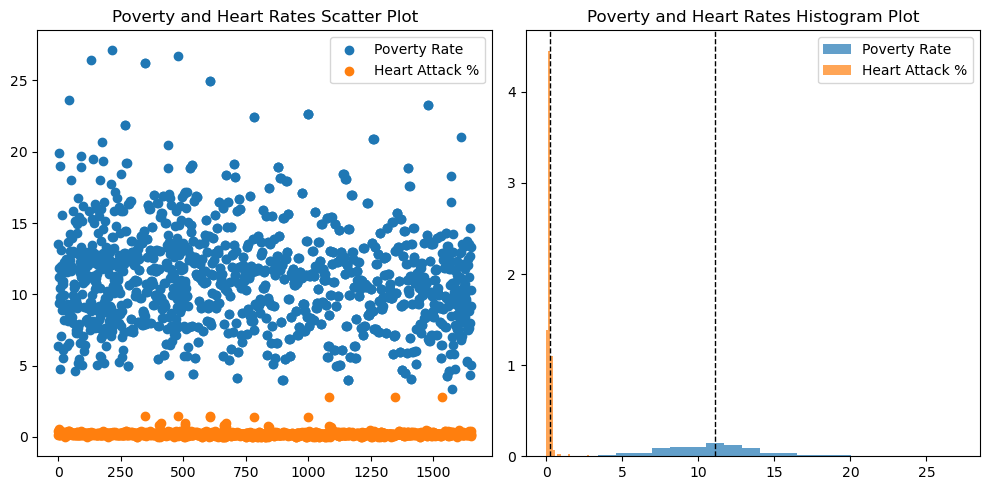

Test Statistic: 130.2376096339052
P-value: 0.0


In [131]:
output_file = 'Charts/Heart/005_poverty_heart_attacks_scattergram.png'
t_test(poverty_heart_df, 'Poverty Rate', 'Heart Attack %', output_file)


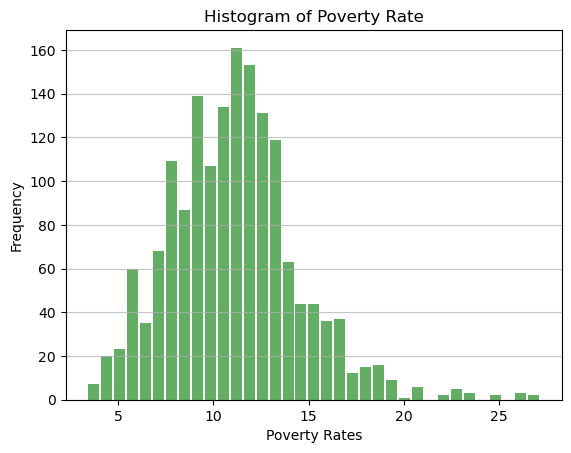

In [132]:
# Looking at bigger historgram plots for comparison 

plt.hist(poverty_heart_df['Poverty Rate'], bins='auto', color='forestgreen', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Poverty Rate')
plt.xlabel('Poverty Rates')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('Charts/Heart/006_poverty_histogram.png')
plt.show()

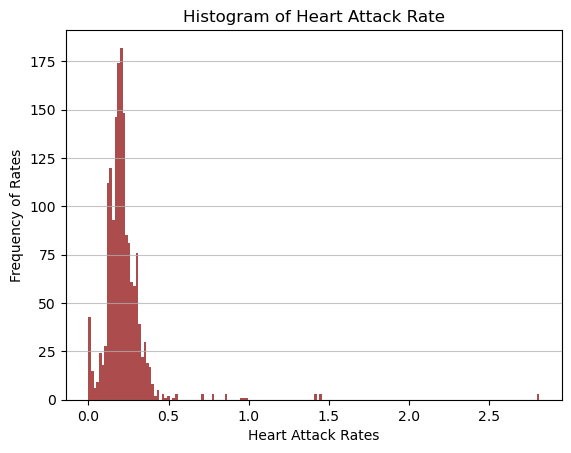

In [133]:

plt.hist(poverty_heart_df['Heart Attack %'], bins='auto', color='darkred', alpha=0.7)
plt.title('Histogram of Heart Attack Rate')
plt.xlabel('Heart Attack Rates')
plt.ylabel('Frequency of Rates')
plt.grid(axis='y', alpha=0.75)
plt.savefig('Charts/Heart/007_heart_histogram.png')
plt.show()

#### The t-test is perhaps not the best measure because of the difference in distributions. More analysis would be needed to determine a relationship

In [134]:
# Because the death data is not broken out by county, need to aggregate the poverty data to include the whole 
# state by year

poverty_state_df = poverty_rate_df.groupby(['Year']).agg({'Poverty Rate': 'mean'}).reset_index()
poverty_state_df.head(5)

,Year,Poverty Rate
0,2010,10.898506
1,2011,11.384828
2,2012,11.563563
3,2013,11.684483
4,2014,11.757126


In [135]:
# Need to merge the new poverty df with the heart death df
# Renaming columns in heart_death_df to make the merge easier

heart_death_df = heart_death_df.rename(columns={'YearStart': 'Year'})
heart_death_df = heart_death_df.rename(columns={'Data_Value': 'Heart Death Rate'})
heart_death_df.head(2)

,RowId,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
10860,NVSS~2010~27~NV001~OVR01~Age-Standardized,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)
10861,NVSS~2010~27~NV001~OVR01~Crude,2010,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)


In [136]:
mn_poverty_rate_df = poverty_rate_df.groupby(['Year', 'County'])['Poverty Rate'].mean().reset_index()
mn_poverty_rate_df

,Year,County,Poverty Rate
0,2010,Aitkin,13.55
1,2010,Anoka,6.41
2,2010,Becker,11.23
3,2010,Beltrami,19.94
4,2010,Benton,11.84
...,...,...,...
1039,2021,Watonwan,13.03
1040,2021,Wilkin,13.53
1041,2021,Winona,13.44
1042,2021,Wright,4.89


In [137]:
poverty_heart_death_df = pd.merge(poverty_state_df, heart_death_df, on=['Year'])
poverty_heart_death_df

,Year,Poverty Rate,RowId,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
0,2010,10.898506,NVSS~2010~27~NV001~OVR01~Age-Standardized,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)
1,2010,10.898506,NVSS~2010~27~NV001~OVR01~Crude,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,27,POINT (-94.7942005 46.35564874)
2,2010,10.898506,NVSS~2010~27~NV001~GEN01~Crude,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Gender,Male,C1,T1,NV001,Crude,BOC02,GEN01,27,POINT (-94.7942005 46.35564874)
3,2010,10.898506,NVSS~2010~27~NV001~GEN01~Age-Standardized,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Gender,Male,C1,T1,NV001,AgeStdz,BOC02,GEN01,27,POINT (-94.7942005 46.35564874)
4,2010,10.898506,NVSS~2010~27~NV001~GEN02~Age-Standardized,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Gender,Female,C1,T1,NV001,AgeStdz,BOC02,GEN02,27,POINT (-94.7942005 46.35564874)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,2020,9.977816,NVSS~2020~27~NV008~RAC02~Crude,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Race,Non-Hispanic Black,C1,T6,NV008,Crude,BOC04,RAC02,27,POINT (-94.7942005 46.35564874)
1756,2020,9.977816,NVSS~2020~27~NV008~RAC04~Crude,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Race,Hispanic,C1,T6,NV008,Crude,BOC04,RAC04,27,POINT (-94.7942005 46.35564874)
1757,2020,9.977816,NVSS~2020~27~NV008~RAC04~Age-Standardized,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Race,Hispanic,C1,T6,NV008,AgeStdz,BOC04,RAC04,27,POINT (-94.7942005 46.35564874)
1758,2020,9.977816,NVSS~2020~27~NV008~RAC07~Age-Standardized,MN,Minnesota,NVSS,NaN,NaN,NaN,NaN,...,Race,Other,C1,T6,NV008,AgeStdz,BOC04,RAC07,27,POINT (-94.7942005 46.35564874)


Poverty Rate and Heart Death Rates:

The r-squared is: 2.8912229554416363e-05


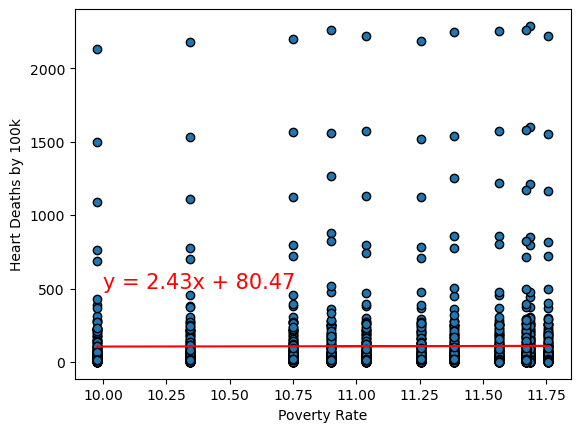

In [138]:
# Linear regression on Poverty and Heart Deaths
x_values = poverty_heart_death_df['Poverty Rate']
y_values = poverty_heart_death_df['Heart Death Rate']

x_label = 'Poverty Rate'
y_label = 'Heart Deaths by 100k'
x_range = (0, 200000)
y_range = (0, 1700)
ann_pos = (10, 500)
output_file = 'Charts/Heart/007_heart_deaths_linear_regression.png'
print('Poverty Rate and Heart Death Rates:')
print('')

lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file)

### Using the poverty rates and death rates from heart events per 100k showed an even weaker relationship. Perhaps the relationship isn't linear. Perhaps there isn't a relationship. More investigation is needed. 

### The null-hypothesis cannot be rejected

#### Another aspect to look at are which counties are the poorest and which counties have the highest death rates

In [139]:
poverty_heart_df.head(2)

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Heart Attack Count,Heart Attack %
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,14.29,45.60,16.07,0.0,79.69,33.04,12.22,44.12,62.666667,0.388534
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39,380.666667,0.117723


In [140]:
# Group by 'County' and calculate the mean poverty rate for each county
average_poverty_by_county = poverty_heart_df.groupby('County')['Poverty Rate'].mean()

# Group by 'County' and calculate the mean heart attack rate for each county
average_heart_by_county = poverty_heart_df.groupby('County')['Heart Attack %'].mean()

# Sort the resulting Series for both poverty and heart attack rates in descending order
worst_poverty_counties = average_poverty_by_county.sort_values(ascending=False)
worst_heart_counties = average_heart_by_county.sort_values(ascending=False)

worst_poverty_counties = worst_poverty_counties.nlargest(15)
worst_heart_counties = worst_heart_counties.nlargest(15)

# Display the worst counties for both poverty and heart attack rates
print(f'The worst counties for poverty are {worst_poverty_counties}')
print("")
print(f'The worst counties for heart attacks are {worst_heart_counties}')

The worst counties for poverty are County
Mahnomen       23.641053
Beltrami       19.404211
Blue Earth     18.401053
Clearwater     16.418947
Wadena         15.896842
Ramsey         15.504211
St. Louis      15.440526
Stevens        15.431053
Nobles         15.350000
Cass           15.214737
Koochiching    15.013158
Winona         14.516316
Mower          14.036316
Todd           14.021053
Cottonwood     13.817895
Name: Poverty Rate, dtype: float64

The worst counties for heart attacks are County
Sibley               0.814350
Mahnomen             0.651468
Stevens              0.418378
Lake of the Woods    0.351858
Traverse             0.348108
Norman               0.343483
Cass                 0.339993
Koochiching          0.324084
Aitkin               0.319372
Becker               0.305331
Steele               0.303839
Itasca               0.300206
Clearwater           0.291243
Wilkin               0.284068
Otter Tail           0.282837
Name: Heart Attack %, dtype: float64


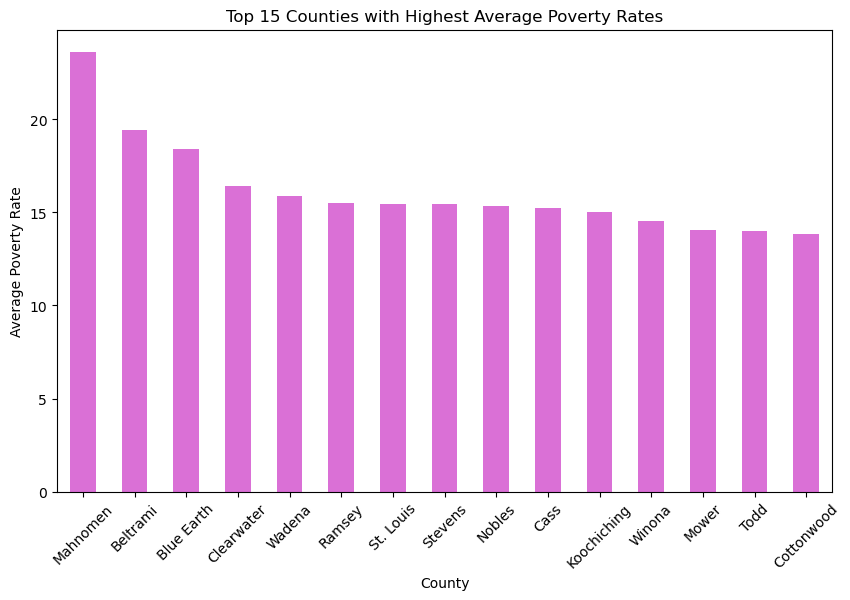

In [141]:
# chart the 5 worst counties for poverty
plt.figure(figsize=(10, 6))
worst_poverty_counties.plot(kind='bar', color='orchid')
plt.title('Top 15 Counties with Highest Average Poverty Rates')
plt.xlabel('County')
plt.ylabel('Average Poverty Rate')
plt.xticks(rotation=45)
plt.savefig("Charts/Poverty/017_top_5_counties_poverty.png")
plt.show()

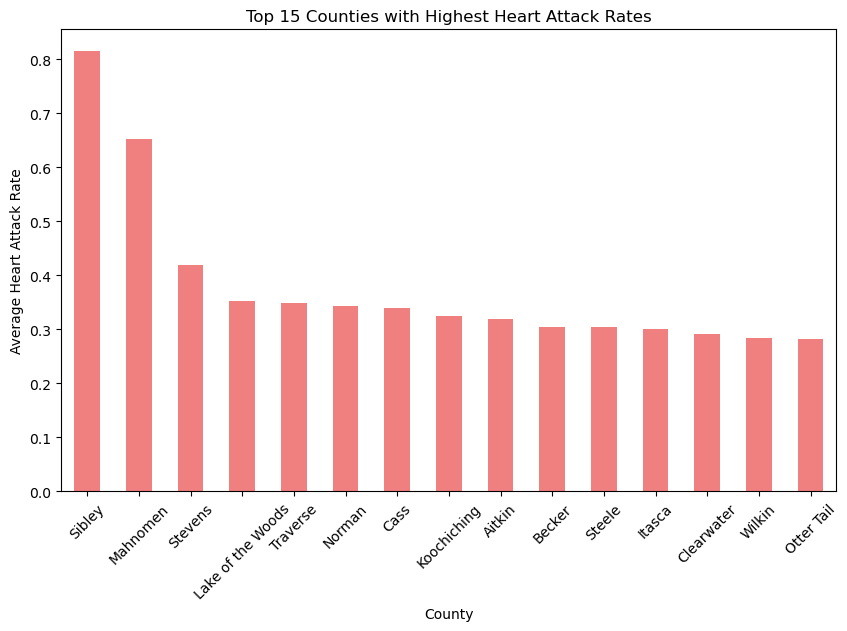

In [142]:
# chart the 5 worst counties for heart attacks
plt.figure(figsize=(10, 6))
worst_heart_counties.plot(kind='bar', color='lightcoral')
plt.title('Top 15 Counties with Highest Heart Attack Rates')
plt.xlabel('County')
plt.ylabel('Average Heart Attack Rate')
plt.xticks(rotation=45)
plt.savefig("Charts/Heart/008_top_5_counties_heart_attacks.png")
plt.show()

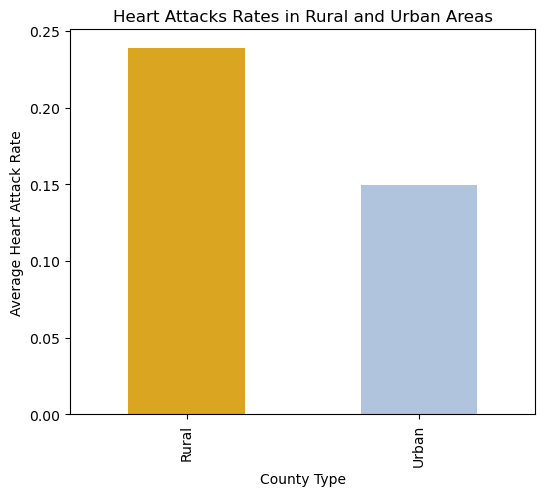

In [143]:
# Plotting County Types and Heart Attacks

plt.figure(figsize=(6,5))

# Group the data by 'County Type' and calculate the mean Heart Attack Count
poverty_heart_by_county_type = poverty_heart_df.groupby('County Type')['Heart Attack %'].mean()

# Create a bar plot
poverty_heart_by_county_type.plot(kind='bar', color=['goldenrod', 'lightsteelblue'])

plt.title('Heart Attacks Rates in Rural and Urban Areas')
plt.xlabel('County Type')
plt.ylabel('Average Heart Attack Rate')
plt.savefig("Charts/Heart/009_heart_attacks_county_type.png")

plt.show()

In [144]:
poverty_heart_df.head()

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Black or African American Alone),Poverty Rate (American Indian and Alaska Native Alone),Poverty Rate (Asian Alone),Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Heart Attack Count,Heart Attack %
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,14.29,45.60,16.07,0.0,79.69,33.04,12.22,44.12,62.666667,0.388534
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,22.62,15.98,6.71,0.0,23.09,11.45,5.13,16.39,380.666667,0.117723
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,34.65,33.07,17.46,0.0,27.40,22.97,8.90,33.03,102.333333,0.323389
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,25.84,50.21,15.30,0.0,17.92,31.26,11.75,28.80,95.666667,0.227545
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,42.88,42.64,9.02,0.0,14.81,50.08,9.95,45.33,56.333333,0.150580


In [145]:
heart_time = poverty_heart_df.groupby('Year')['Heart Attack %'].mean()
# poverty_time = poverty_heart_df.groupby('Year')['Poverty Rate'].mean()


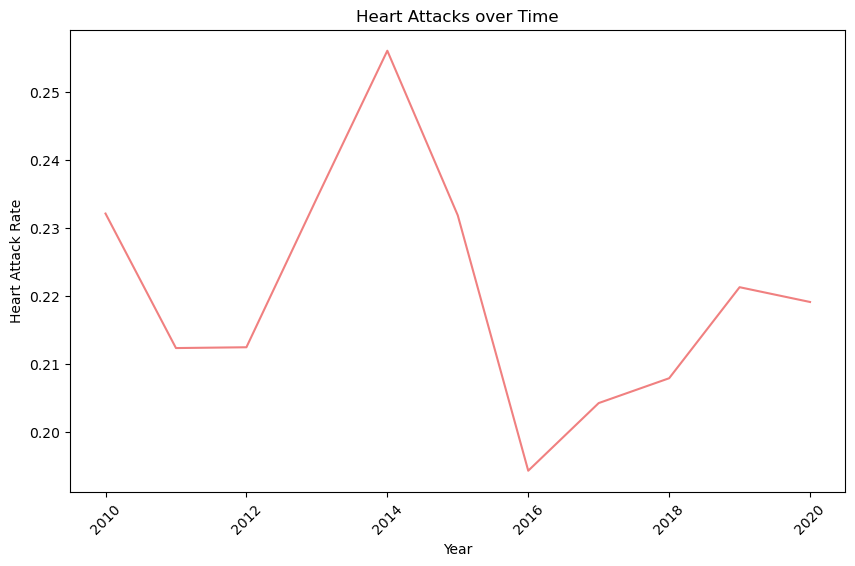

In [146]:
# Chart Heart Attacks Over Time
plt.figure(figsize=(10, 6))
heart_time.plot(kind='line', color='lightcoral')
plt.title('Heart Attacks over Time')
plt.xlabel('Year')
plt.ylabel('Heart Attack Rate')
plt.xticks(rotation=45)
plt.savefig("Charts/Heart/010_heart_attacks_time.png")
plt.show()

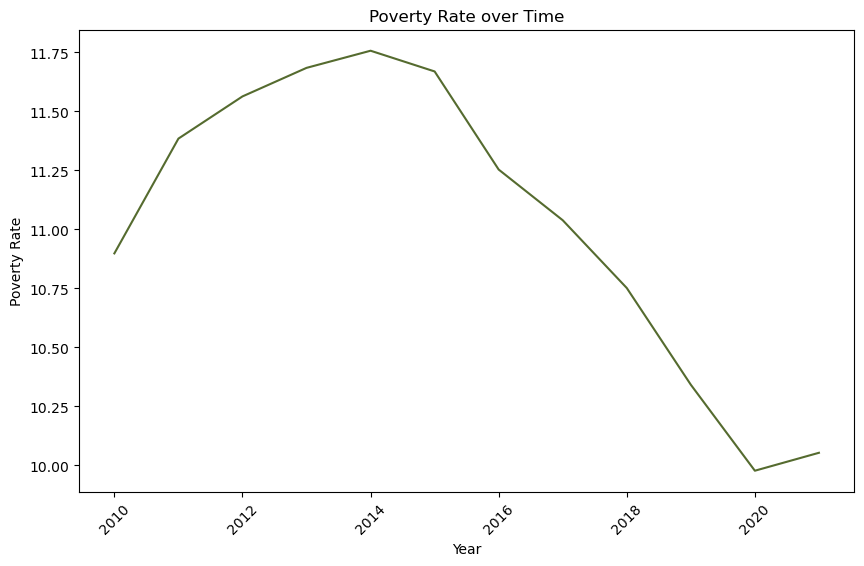

In [147]:
# Chart Poverty Over Time
plt.figure(figsize=(10, 6))
poverty_time.plot(kind='line', color='darkolivegreen')
plt.title('Poverty Rate over Time')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45)
plt.show()

### Cannot support the hypothesis- more information needed as there is no linear relationship and the distributions are different between the data sets. The t-test shows a pvalue of 0 but there is indication this may be the wrong test. 

# Cancer

## Hypothesis: As poverty rates increase, so will cancer rates

In [148]:

# Load Cancer Data
path_cancer = Path("Resources/cancer.csv")
cancer_df = pd.read_csv(path_cancer)
cancer_df.head()

,fips,location,year,type,age,sex,count,population,rate,unstable,ci,lci,uci
0,27000,Minnesota,2015-2019,Chronic lymphocytic leukemia,All Ages,All,2100,27816887,6.2,False,(5.9 - 6.5),5.9,6.5
1,27000,Minnesota,2015-2019,Thyroid,All Ages,All,3561,27816887,12.3,False,(11.9 - 12.7),11.9,12.7
2,27000,Minnesota,2010-2014,Thyroid,All Ages,All,3601,26898172,13,False,(12.5 - 13.4),12.5,13.4
3,27000,Minnesota,2015-2019,Pancreas,All Ages,All,4653,27816887,13.8,False,(13.4 - 14.2),13.4,14.2
4,27000,Minnesota,2010-2014,Pancreas,All Ages,All,3619,26898172,12,False,(11.6 - 12.4),11.6,12.4


In [149]:
# Data cleaning
# Need to ungroup years

cancer_df['year'] = cancer_df['year'].astype(str)

def distribute_count(row):
    try:
        start_year, end_year = map(int, row['year'].split('-'))
        year_range = end_year - start_year + 1
        count_per_year = row['count'] / year_range
        years = list(range(start_year, end_year + 1))
        counts = [count_per_year] * year_range

        # Create a DataFrame with the original columns and the new 'year' and 'count' columns
        result_df = pd.DataFrame({
            'location': [row['location']] * year_range,
            'year': years,
            'count': counts,
            'type': [row['type']] * year_range,
            'population': [row['population']] * year_range,
            'rate': [row['rate']] * year_range,
            'unstable': [row['unstable']] * year_range
        })

        return result_df

    except (ValueError, AttributeError):
        return pd.DataFrame()

# Apply the function to each row and concatenate the results
cancer_clean_df = pd.concat(cancer_df.apply(distribute_count, axis=1).tolist(), ignore_index=True)

# Rename columns
cancer_clean_df = cancer_clean_df.rename(columns={'location': 'County', 'year': 'Year', 'count' : 'Cancer Count', 
                                                  'type' : 'Cancer Type', 'population' : 'County Population',
                                                  'rate' : 'Cancer Count per 100k'})


# Display the resulting DataFrame
cancer_clean_df



,County,Year,Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
0,Minnesota,2015,420.0,Chronic lymphocytic leukemia,27816887,6.2,False
1,Minnesota,2016,420.0,Chronic lymphocytic leukemia,27816887,6.2,False
2,Minnesota,2017,420.0,Chronic lymphocytic leukemia,27816887,6.2,False
3,Minnesota,2018,420.0,Chronic lymphocytic leukemia,27816887,6.2,False
4,Minnesota,2019,420.0,Chronic lymphocytic leukemia,27816887,6.2,False
...,...,...,...,...,...,...,...
15835,Yellow Medicine,2015,1.8,Thyroid,49069,14.5 (UR),True
15836,Yellow Medicine,2016,1.8,Thyroid,49069,14.5 (UR),True
15837,Yellow Medicine,2017,1.8,Thyroid,49069,14.5 (UR),True
15838,Yellow Medicine,2018,1.8,Thyroid,49069,14.5 (UR),True


In [150]:
# More cleaning and filtering

# Remove Unstable Results
cancer_clean_df = cancer_clean_df[cancer_clean_df['unstable'] == False]

# Remove Minnesota as a County
cancer_clean_df = cancer_clean_df[cancer_clean_df['County'] != 'Minnesota']

# Ensure columns are correct types:
cancer_clean_df['Cancer Count per 100k'] = cancer_clean_df['Cancer Count per 100k'].astype(float).fillna(0).round(2)
cancer_clean_df['Cancer Count'] = cancer_clean_df['Cancer Count'].astype(float).fillna(0).round(2)
cancer_clean_df['County Population'] = cancer_clean_df['County Population'].astype(int).fillna(0)

cancer_clean_df 



,County,Year,Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
185,Aitkin,2010,132.8,All cancer types combined,80137,438.9,False
186,Aitkin,2011,132.8,All cancer types combined,80137,438.9,False
187,Aitkin,2012,132.8,All cancer types combined,80137,438.9,False
188,Aitkin,2013,132.8,All cancer types combined,80137,438.9,False
189,Aitkin,2014,132.8,All cancer types combined,80137,438.9,False
...,...,...,...,...,...,...,...
15830,Yellow Medicine,2010,64.2,All cancer types combined,50920,437.3,False
15831,Yellow Medicine,2011,64.2,All cancer types combined,50920,437.3,False
15832,Yellow Medicine,2012,64.2,All cancer types combined,50920,437.3,False
15833,Yellow Medicine,2013,64.2,All cancer types combined,50920,437.3,False


In [151]:
cancer_types = cancer_clean_df['Cancer Type'].unique()
print(cancer_types)

['All cancer types combined' 'Lung and bronchus' 'Pancreas' 'Colorectal'
 'Non-Hodgkin lymphoma' 'Kidney' 'Chronic lymphocytic leukemia' 'Leukemia'
 'Brain and other nervous system' 'Liver and bile duct' 'Melanoma'
 'Bladder' 'Oral and pharyngeal' 'Thyroid' 'Mesothelioma'
 'Acute myeloid leukemia' 'Larynx' 'Esophagus']


In [152]:
all_cancer_df = cancer_clean_df[cancer_clean_df['Cancer Type'] == "All cancer types combined"]

individual_cancers_df = cancer_clean_df[cancer_clean_df['Cancer Type'] != "All cancer types combined"]
individual_cancers_df

,County,Year,Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
190,Aitkin,2010,19.8,Lung and bronchus,80137,60.7,False
191,Aitkin,2011,19.8,Lung and bronchus,80137,60.7,False
192,Aitkin,2012,19.8,Lung and bronchus,80137,60.7,False
193,Aitkin,2013,19.8,Lung and bronchus,80137,60.7,False
194,Aitkin,2014,19.8,Lung and bronchus,80137,60.7,False
...,...,...,...,...,...,...,...
15825,Yellow Medicine,2010,3.2,Kidney,50920,20.4,False
15826,Yellow Medicine,2011,3.2,Kidney,50920,20.4,False
15827,Yellow Medicine,2012,3.2,Kidney,50920,20.4,False
15828,Yellow Medicine,2013,3.2,Kidney,50920,20.4,False


In [154]:
i = individual_cancers_df['Cancer Type'].value_counts()
i

Cancer Type
Lung and bronchus                 870
Colorectal                        860
Bladder                           800
Non-Hodgkin lymphoma              775
Melanoma                          775
Kidney                            725
Leukemia                          700
Pancreas                          665
Oral and pharyngeal               630
Thyroid                           535
Chronic lymphocytic leukemia      420
Brain and other nervous system    400
Liver and bile duct               375
Esophagus                         365
Acute myeloid leukemia            295
Larynx                            195
Mesothelioma                       75
Name: count, dtype: int64

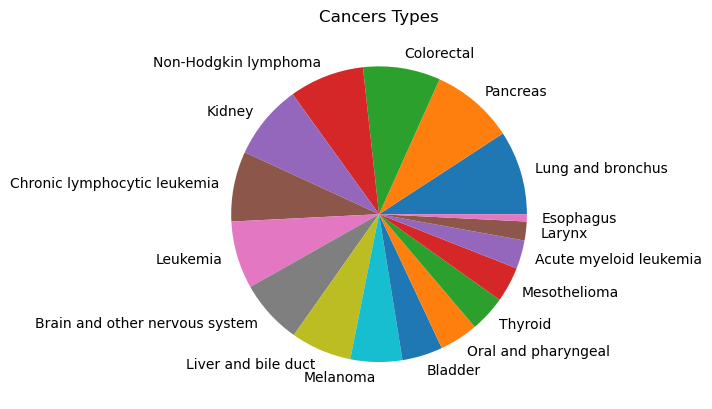

In [155]:
plt.pie(i, labels = individual_cancers_df['Cancer Type'].unique())
plt.title('Cancers Types')
plt.savefig("Charts/Cancer/001_cancer_pie.png")
plt.show()

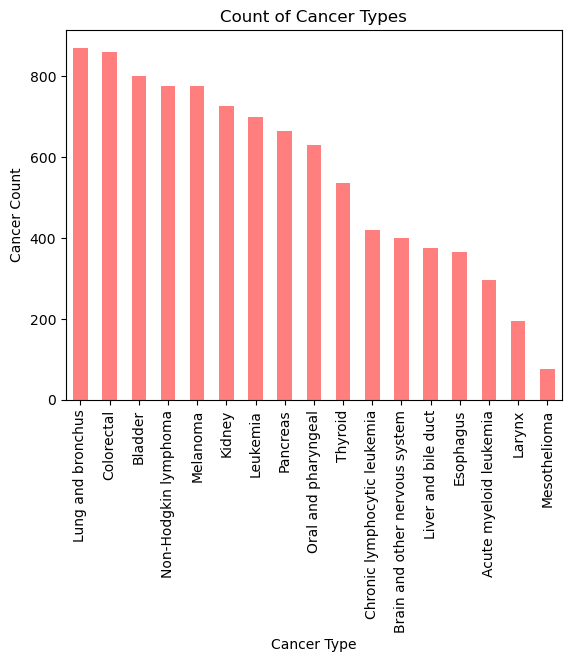

In [156]:
p = individual_cancers_df['Cancer Type'].value_counts().plot(kind='bar', color='r', alpha=0.5)
plt.title('Count of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Cancer Count')
plt.savefig('Charts/Cancer/005_cancer_types_bar.png',dpi=300, bbox_inches = "tight")

plt.show()


In [157]:
# Merge the data into a new DF
poverty_cancer_all_df = pd.merge(
    poverty_rate_df, 
    all_cancer_df, 
    left_on=['Year', 'County'],  
    right_on=['Year', 'County'],  
    how='inner',

)

poverty_cancer_all_df


,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,0.0,79.69,33.04,12.22,44.12,132.8,All cancer types combined,80137,438.9,False
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,0.0,23.09,11.45,5.13,16.39,1636.4,All cancer types combined,1681377,482.6,False
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,0.0,27.40,22.97,8.90,33.03,197.2,All cancer types combined,164743,445.0,False
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,0.0,17.92,31.26,11.75,28.80,228.4,All cancer types combined,225894,468.9,False
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,0.0,14.81,50.08,9.95,45.33,174.6,All cancer types combined,193976,437.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2019,Watonwan,Rural,10836.0,1451.0,605.0,846.0,13.39,5.58,7.81,...,0.0,19.55,25.81,10.04,21.24,66.4,All cancer types combined,54858,445.3,False
866,2019,Wilkin,Rural,6147.0,564.0,204.0,360.0,9.18,3.32,5.86,...,0.0,75.00,45.65,8.86,33.33,45.8,All cancer types combined,31453,522.6,False
867,2019,Winona,Rural,47085.0,6074.0,2849.0,3225.0,12.90,6.05,6.85,...,0.0,32.02,17.74,12.57,15.98,277.4,All cancer types combined,253625,461.2,False
868,2019,Wright,Urban,132905.0,6122.0,2649.0,3473.0,4.61,1.99,2.61,...,0.0,2.47,6.98,4.53,5.03,622.4,All cancer types combined,672192,450.5,False


In [158]:
# Filling in the blanks with zeros in order to graph the data properly
poverty_cancer_all_df['Cancer Count per 100k'] = poverty_cancer_all_df['Cancer Count per 100k'].fillna(0)
poverty_cancer_all_df.head(5)


,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Native Hawaiian and Other Pacific Islander Alone),Poverty Rate (Some Other Race Alone),Poverty Rate (Two or More Races),"Poverty Rate (White Alone, Not Hispanic or Latino)",Poverty Rate (Hispanic or Latino),Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,0.0,79.69,33.04,12.22,44.12,132.8,All cancer types combined,80137,438.9,False
1,2010,Anoka,Urban,323359.0,20730.0,8994.0,11736.0,6.41,2.78,3.63,...,0.0,23.09,11.45,5.13,16.39,1636.4,All cancer types combined,1681377,482.6,False
2,2010,Becker,Rural,31644.0,3554.0,1544.0,2010.0,11.23,4.88,6.35,...,0.0,27.40,22.97,8.90,33.03,197.2,All cancer types combined,164743,445.0,False
3,2010,Beltrami,Rural,42043.0,8383.0,3855.0,4528.0,19.94,9.17,10.77,...,0.0,17.92,31.26,11.75,28.80,228.4,All cancer types combined,225894,468.9,False
4,2010,Benton,Urban,37411.0,4428.0,1858.0,2570.0,11.84,4.97,6.87,...,0.0,14.81,50.08,9.95,45.33,174.6,All cancer types combined,193976,437.1,False


<Figure size 1000x600 with 0 Axes>

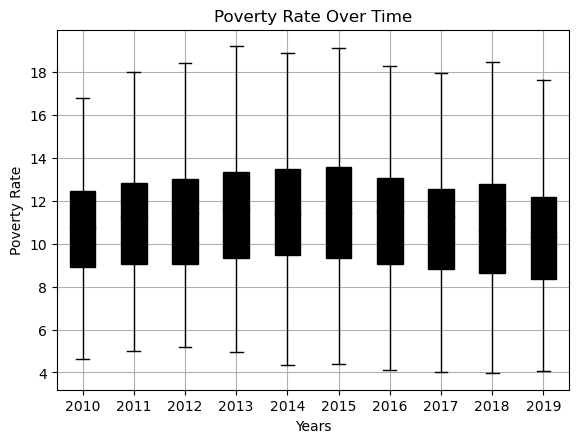

In [159]:

plt.figure(figsize=(10, 6))
poverty_cancer_all_df.boxplot(column=['Poverty Rate'], by='Year', color="black", showfliers=False, patch_artist=True)
plt.title('Poverty Rate Over Time')
plt.ylabel('Poverty Rate')
plt.xlabel('Years')
plt.suptitle('')
plt.savefig("Charts/Poverty/003_poverty_time_box_plot.png")

plt.show()

In [160]:
stats.levene(poverty_cancer_all_df['Poverty Rate'], poverty_cancer_all_df['Cancer Count per 100k'])


LeveneResult(statistic=822.1623733025793, pvalue=2.2221173826818317e-148)

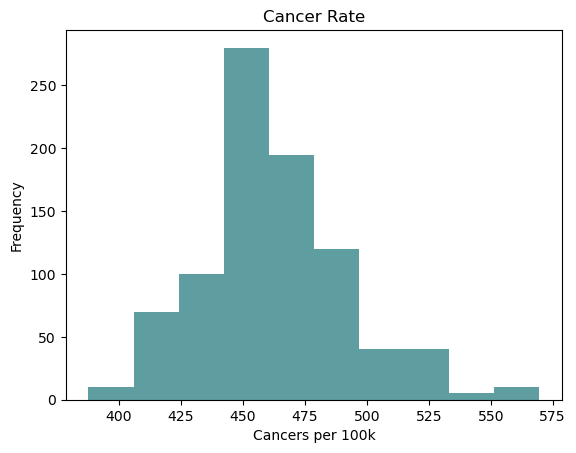

In [161]:
poverty_cancer_all_df['Cancer Count per 100k'].plot(kind="hist", title="Cancer Rate", color="cadetblue")
plt.xlabel("Cancers per 100k")
plt.savefig('Charts/Cancer/001_Cancer_distribution.png')
plt.show()

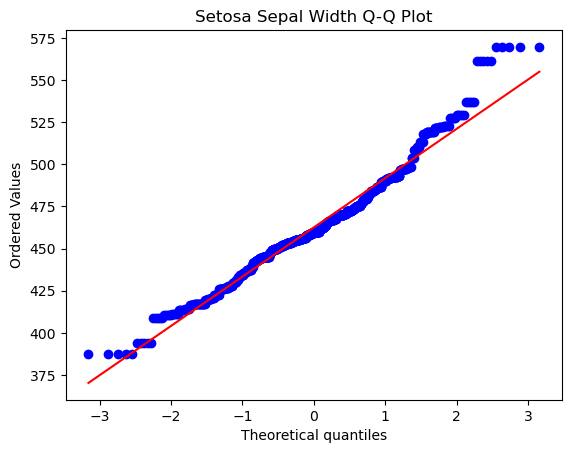

In [162]:
stats.probplot(poverty_cancer_all_df['Cancer Count per 100k'], dist="norm", plot= plt)
plt.title("Setosa Sepal Width Q-Q Plot")
plt.savefig("Charts/Cancer/002_Cancer_qqplot.png")
plt.show()


In [163]:
stats.shapiro(poverty_cancer_all_df['Cancer Count per 100k'])


ShapiroResult(statistic=0.9738328456878662, pvalue=2.1857508858413865e-11)

% of People in Poverty vs Number of Cancers (All Types):

The r-squared is: 0.0025054852318048084


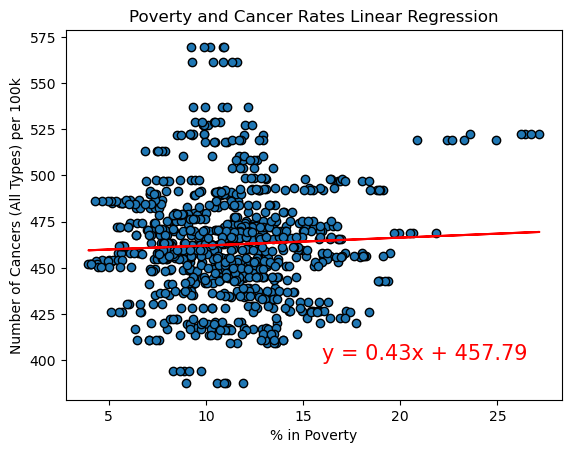

In [164]:
# Linear regression on Heart Attacks and Poverty
x_values = poverty_cancer_all_df['Poverty Rate']
y_values = poverty_cancer_all_df['Cancer Count per 100k']

x_label = '% in Poverty'
y_label = 'Number of Cancers (All Types) per 100k'
x_range = (0, 200000)
y_range = (0, 1700)
ann_pos = (16, 400)
title = "Poverty and Cancer Rates Linear Regression" 
output_file = 'Charts/Cancer/003_cancer_linear_regression.png'

print('% of People in Poverty vs Number of Cancers (All Types):')
print('')

lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file, title)

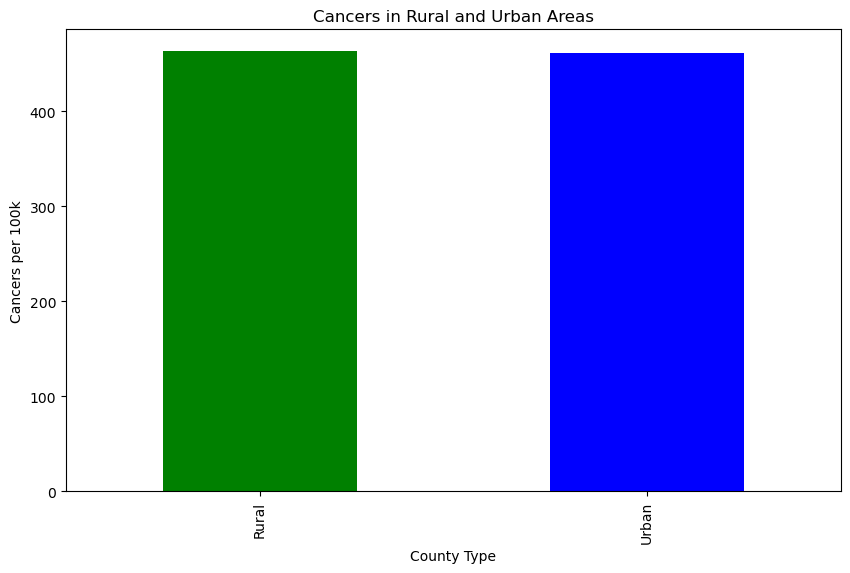

In [165]:
# Plotting County Types and Heart Attacks

plt.figure(figsize=(10, 6))

# Group the data by 'County Type' and calculate the mean Heart Attack Count
poverty_cancer_all_by_county_type = poverty_cancer_all_df.groupby('County Type')['Cancer Count per 100k'].mean()

# Create a bar plot
poverty_cancer_all_by_county_type.plot(kind='bar', color=['green', 'blue'])

plt.title('Cancers in Rural and Urban Areas')
plt.xlabel('County Type')
plt.ylabel('Cancers per 100k')
plt.savefig('Charts/Cancer/004_cancer_by_county.png')
plt.show()

In [166]:
# All Cancer Stats

funcs = ['mean', 'median', 'var', 'std', 'sem']
agg_funcs = {"Cancer Count per 100k": funcs}
cancer_all_stats_agg = poverty_cancer_all_df.groupby(["County"]).agg(agg_funcs)
cancer_all_stats_agg.columns = ['{}_{}'.format(col[0], col[1]) for col in cancer_all_stats_agg.columns]
cancer_all_stats_agg


,Cancer Count per 100k_mean,Cancer Count per 100k_median,Cancer Count per 100k_var,Cancer Count per 100k_std,Cancer Count per 100k_sem
County,,,,,
Aitkin,444.20,444.20,31.211111,5.586691,1.766667
Anoka,484.55,484.55,4.225000,2.055480,0.650000
Becker,468.45,468.45,611.002778,24.718470,7.816667
Beltrami,480.60,480.60,152.100000,12.332883,3.900000
Benton,432.60,432.60,22.500000,4.743416,1.500000
...,...,...,...,...,...
Watonwan,433.00,433.00,168.100000,12.965338,4.100000
Wilkin,496.65,496.65,748.225000,27.353702,8.650000
Winona,465.45,465.45,20.069444,4.479893,1.416667


In [167]:
poverty_heart_df.columns


Index(['Year', 'County', 'County Type', 'Sample Population',
       'Poverty Population', 'Male Poverty', 'Female Poverty', 'Poverty Rate',
       'Male Poverty Rate', 'Female Poverty Rate', 'Child Poverty Rate',
       'Senior Poverty Rate', 'Poverty Rate (White Alone)',
       'Poverty Rate (Black or African American Alone)',
       'Poverty Rate (American Indian and Alaska Native Alone)',
       'Poverty Rate (Asian Alone)',
       'Poverty Rate (Native Hawaiian and Other Pacific Islander Alone)',
       'Poverty Rate (Some Other Race Alone)',
       'Poverty Rate (Two or More Races)',
       'Poverty Rate (White Alone, Not Hispanic or Latino)',
       'Poverty Rate (Hispanic or Latino)', 'Heart Attack Count',
       'Heart Attack %'],
      dtype='object')

In [168]:
arsenic_df.columns
arsenic_df = arsenic_df.rename(columns={'year': 'Year', 'countyServed': 'County'})
arsenic_df.columns


Index(['Unnamed: 0', 'Year', 'County', 'max arsenic (ug/L)'], dtype='object')

In [169]:
cancer_clean_df.columns


Index(['County', 'Year', 'Cancer Count', 'Cancer Type', 'County Population',
       'Cancer Count per 100k', 'unstable'],
      dtype='object')

In [170]:
# merge poverty_heart_df, arsenic_df, cancer_clean_df 
merged_df = pd.merge(poverty_heart_df, arsenic_df, on=['Year', 'County'], how='inner')
merged_df = pd.merge(merged_df, cancer_clean_df, on=['Year', 'County'], how='inner')
merged_df.head()

,Year,County,County Type,Sample Population,Poverty Population,Male Poverty,Female Poverty,Poverty Rate,Male Poverty Rate,Female Poverty Rate,...,Poverty Rate (Hispanic or Latino),Heart Attack Count,Heart Attack %,Unnamed: 0,max arsenic (ug/L),Cancer Count,Cancer Type,County Population,Cancer Count per 100k,unstable
0,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,44.12,62.666667,0.388534,861,5.82,132.8,All cancer types combined,80137,438.9,False
1,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,44.12,62.666667,0.388534,861,5.82,19.8,Lung and bronchus,80137,60.7,False
2,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,44.12,62.666667,0.388534,861,5.82,5.0,Pancreas,80137,14.3,False
3,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,44.12,62.666667,0.388534,861,5.82,5.8,Kidney,80137,23.3,False
4,2010,Aitkin,Rural,16129.0,2185.0,988.0,1197.0,13.55,6.13,7.42,...,44.12,62.666667,0.388534,861,5.82,2.4,Chronic lymphocytic leukemia,80137,7.1,False


The r-squared is: 0.002027907785312895


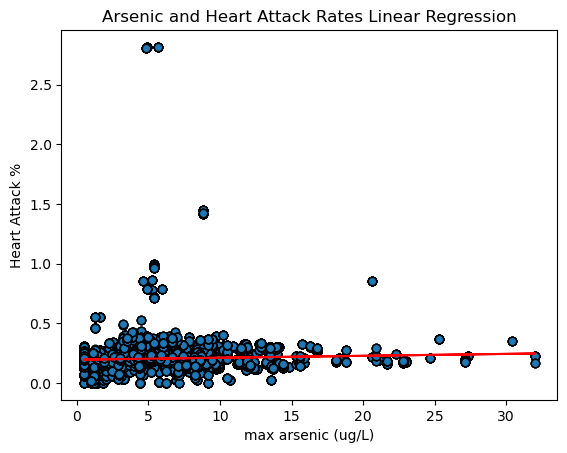

In [171]:
# Linear regression on Heart Attacks and Arsenic
x_values = merged_df['max arsenic (ug/L)']
y_values = merged_df['Heart Attack %']

x_label = 'max arsenic (ug/L)'
y_label = 'Heart Attack %'
x_range = (0, 200000)
y_range = (0, 1700)
ann_pos = (16, 400)
title = "Arsenic and Heart Attack Rates Linear Regression" 
output_file = 'Charts/Heart/011_heart_arsenic_linear_regression.png'

lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file, title)

The r-squared is: 0.00021802983131824702


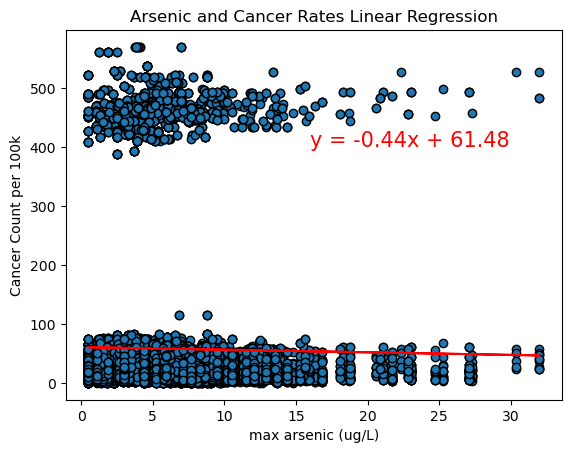

In [172]:
# Linear regression on Cancer and Arsenic
x_values = merged_df['max arsenic (ug/L)']
y_values = merged_df['Cancer Count per 100k']

x_label = 'max arsenic (ug/L)'
y_label = 'Cancer Count per 100k'
x_range = (0, 200000)
y_range = (0, 1700)
ann_pos = (16, 400)
title = "Arsenic and Cancer Rates Linear Regression" 
output_file = 'Charts/Cancer/006_cancer_arsenic_linear_regression.png'

lrp_function(x_values, y_values, x_label, y_label, ann_pos, output_file, title)